**To do**
* Plot sales as a time-series : check if there are any patterns (DONE)
* Plot correlation matrix of features (DONE)
* Add linear regressions
  * Awareness vs Sales (DONE)
  * Consideration vs Sales (DONE)
  * Ads vs Sales (t = 0, t + 1, t + 2 ...) (DONE)
  * PoSPromotions vs Sales, InfluencerColabs vs Sales (DONE)
* Standardize the data (DONE)
* Find a way to include lag effect in the analysis
  * Include lag variables (DONE)
  * Compute the mean of everything for a given period (WIP)
* Add features to the model (DONE)
  * Log features
  * Power features
  * Interaction features
  * Variation features
* Add K-fold cross validation to the model (DONE)
* For the slides :    
  * Plot the effect of Insta, Tik Tok, SEA, Colabs
  * Plot sales and predictions
  * Recap the method we used for the analysis
  * Recap the results of the analysis
* Save the prediction in a CSV file for the other to use in the dashboard (DONE)

In [ ]:
# Import useful packages

install.packages("caret")
install.packages("MASS")

library(caret)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice



In [ ]:
set.seed(64)
load("/content/MindSet Data.RData")

# EDA

In [ ]:
head(MindSetDF)
summary(MindSetDF)
str(MindSetDF)

,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67339.33,21.45271,5.410019,6.761116,301,473,20,233,733
2,66782.95,21.94404,4.751098,6.891903,1429,830,233,149,961
3,62018.96,21.66614,-8.360183,-5.685113,446,903,398,53,651
4,72356.29,22.00408,10.492587,12.684786,123,374,2463,38,805
5,63810.37,21.92331,-4.529078,-1.271630,643,591,1261,315,685
6,66345.92,21.99818,0.759741,3.055361,501,775,686,286,827


     Sales         Awareness         Liking        Consideration     
 Min.   :56117   Min.   :20.84   Min.   :-19.722   Min.   :-16.5002  
 1st Qu.:65277   1st Qu.:21.85   1st Qu.: -3.096   1st Qu.: -0.2323  
 Median :67522   Median :21.97   Median :  1.641   Median :  4.2962  
 Mean   :67506   Mean   :21.96   Mean   :  1.259   Mean   :  4.0564  
 3rd Qu.:70098   3rd Qu.:22.09   3rd Qu.:  5.653   3rd Qu.:  8.3641  
 Max.   :78658   Max.   :22.46   Max.   : 22.831   Max.   : 25.6496  
  InstagramAds      TikTokAds           SEA         PoSPromotions  
 Min.   :   1.0   Min.   :   4.0   Min.   :   0.0   Min.   :  2.0  
 1st Qu.: 318.8   1st Qu.: 223.0   1st Qu.: 678.8   1st Qu.:103.8  
 Median : 638.5   Median : 450.0   Median :1324.5   Median :163.0  
 Mean   : 663.0   Mean   : 465.7   Mean   :1428.2   Mean   :168.7  
 3rd Qu.: 984.8   3rd Qu.: 691.0   3rd Qu.:2024.8   3rd Qu.:227.0  
 Max.   :1499.0   Max.   :1000.0   Max.   :4491.0   Max.   :479.0  
 InfluencerColabs
 Min.   : 379.0 

'data.frame':	1100 obs. of  9 variables:
 $ Sales           : Time-Series  from 1 to 1100: 67339 66783 62019 72356 63810 ...
 $ Awareness       : Time-Series  from 1 to 1100: 21.5 21.9 21.7 22 21.9 ...
 $ Liking          : Time-Series  from 1 to 1100: 5.41 4.75 -8.36 10.49 -4.53 ...
 $ Consideration   : Time-Series  from 1 to 1100: 6.76 6.89 -5.69 12.68 -1.27 ...
 $ InstagramAds    : Time-Series  from 1 to 1100: 301 1429 446 123 643 ...
 $ TikTokAds       : Time-Series  from 1 to 1100: 473 830 903 374 591 775 591 483 568 845 ...
 $ SEA             : Time-Series  from 1 to 1100: 20 233 398 2463 1261 ...
 $ PoSPromotions   : Time-Series  from 1 to 1100: 233 149 53 38 315 286 285 267 138 74 ...
 $ InfluencerColabs: Time-Series  from 1 to 1100: 733 961 651 805 685 827 977 711 727 668 ...


## Correlation matrix

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



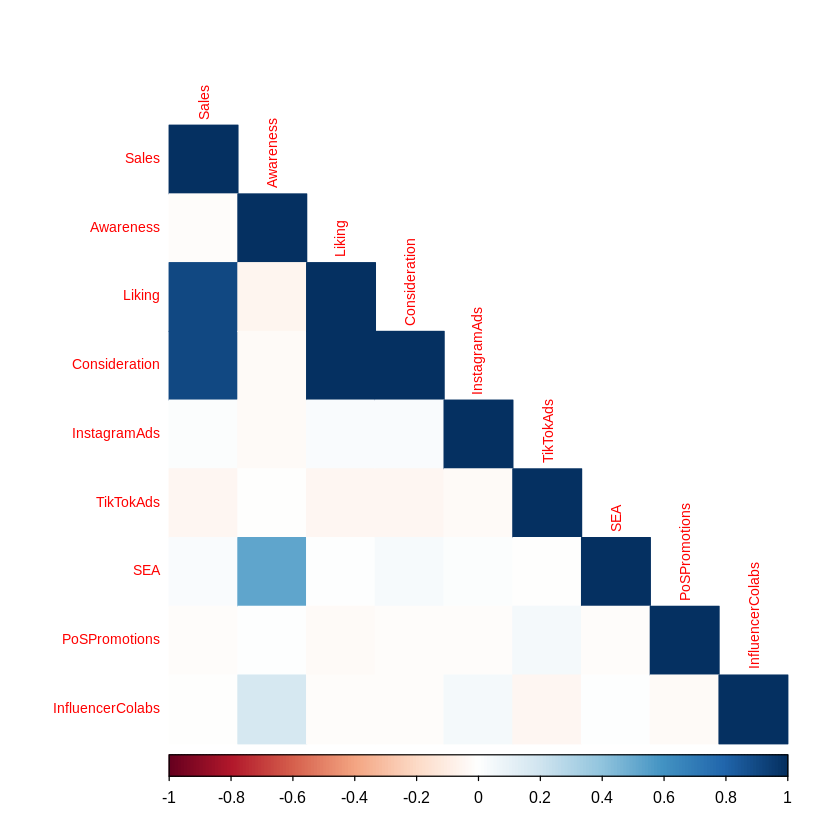

In [ ]:
install.packages("corrplot")
library(corrplot)

# Calculate the correlation matrix
correlation_matrix <- cor(MindSetDF)

# Plot the correlation matrix
corrplot(correlation_matrix, method = "color", type = "lower", tl.cex = 0.7)

Liking and consideration seems to be the most correlated variables to sales

## Pairwise correlation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuou

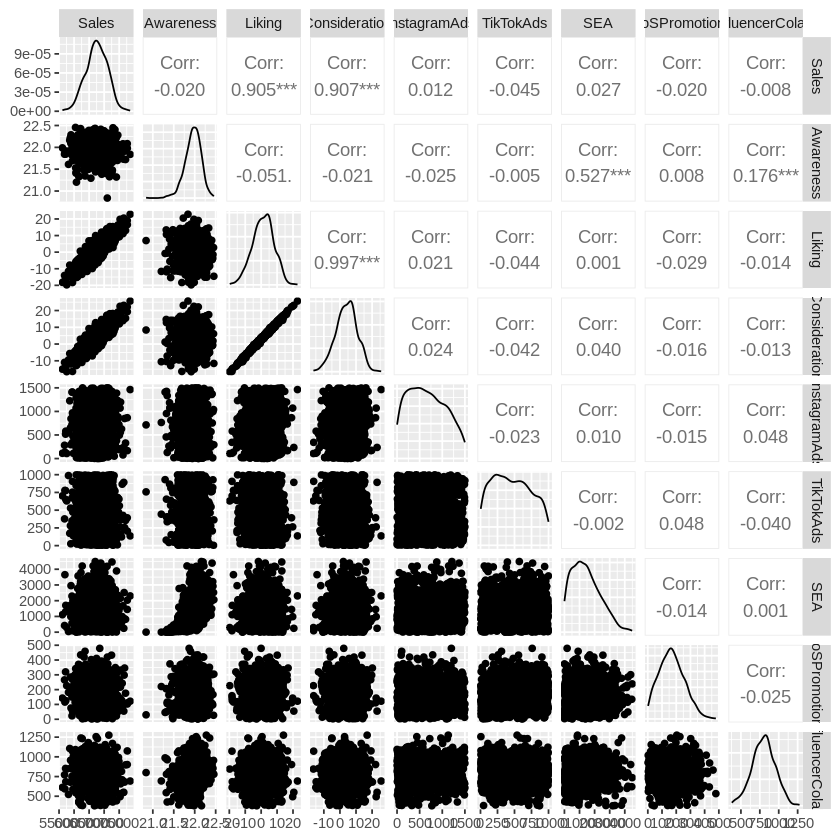

In [ ]:
install.packages("GGally")
library(GGally)

# Create pairwise scatter plots
ggpairs(MindSetDF)

## PCA analysis

In [ ]:
# Exclude the 'Sales' column before performing PCA
features <- MindSetDF[, -1]  # Exclude the 'Sales' column

# Standardize the features if needed
standardized_features <- scale(features)

# Perform PCA
pca_result <- prcomp(standardized_features)

# Display a summary of the PCA
summary(pca_result)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5    PC6     PC7
Standard deviation     1.4166 1.2475 1.0447 0.9996 0.9799 0.9718 0.66351
Proportion of Variance 0.2508 0.1946 0.1364 0.1249 0.1200 0.1181 0.05503
Cumulative Proportion  0.2508 0.4454 0.5818 0.7067 0.8267 0.9448 0.99980
                           PC8
Standard deviation     0.04049
Proportion of Variance 0.00020
Cumulative Proportion  1.00000

## Plotting the data as a time-series

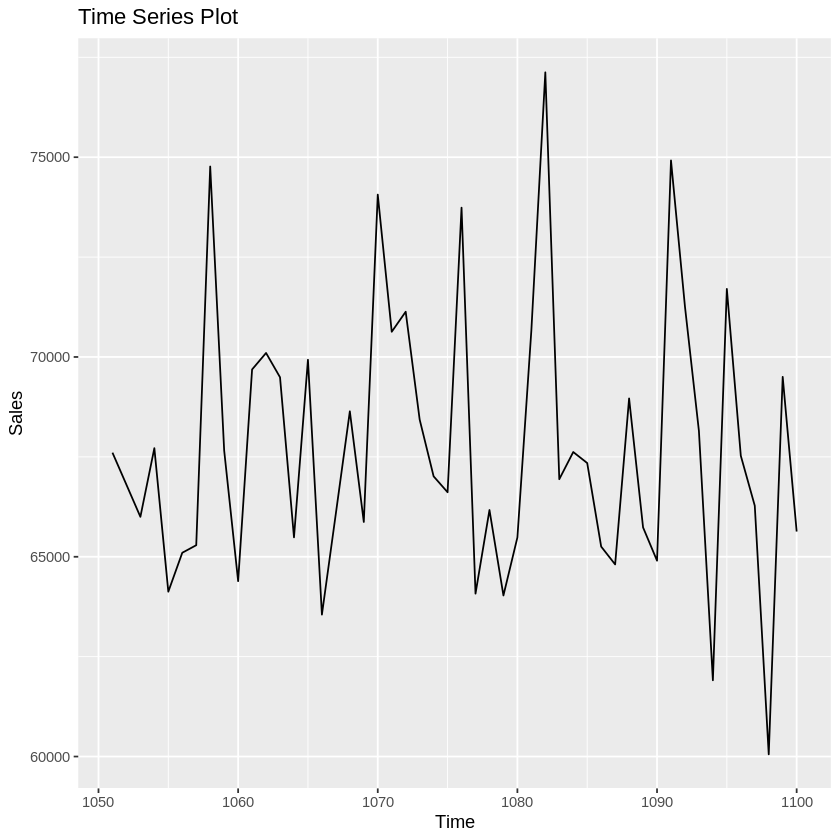

In [ ]:
library(ggplot2)

# Create a sequence for the x-axis
MindSetDF$Time <- seq_len(nrow(MindSetDF))

# Plot the time series
ggplot(tail(MindSetDF,50), aes(x = Time, y = Sales)) +
  geom_line() +
  labs(title = "Time Series Plot",
       x = "Time",
       y = "Sales")

This looks like a random walk. No identifiable patterns.

Linear regression

[1] "Sales vs variables"


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


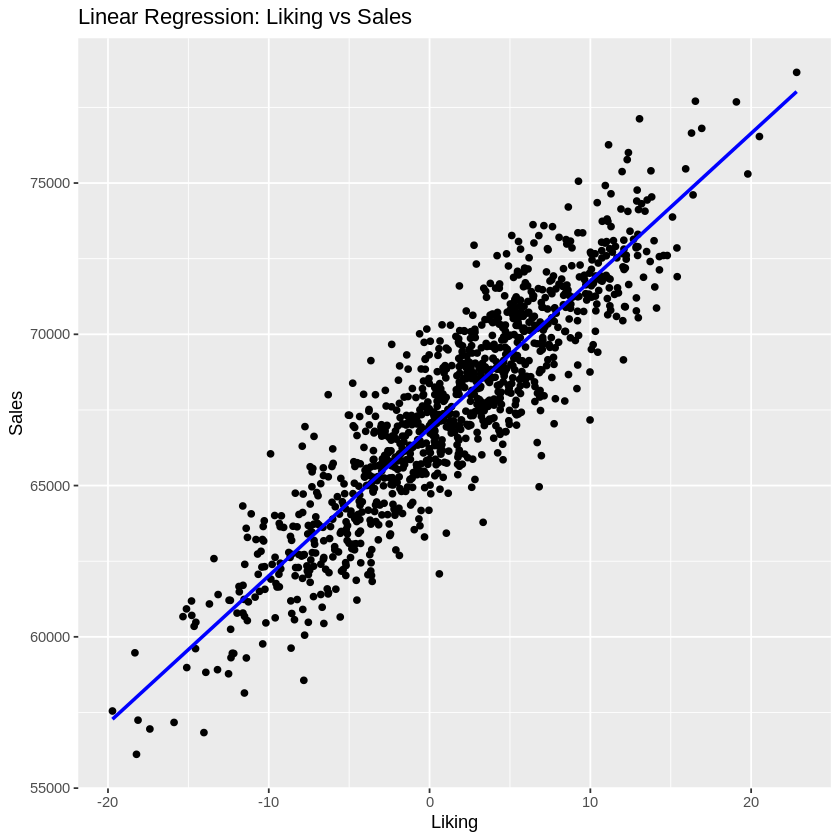

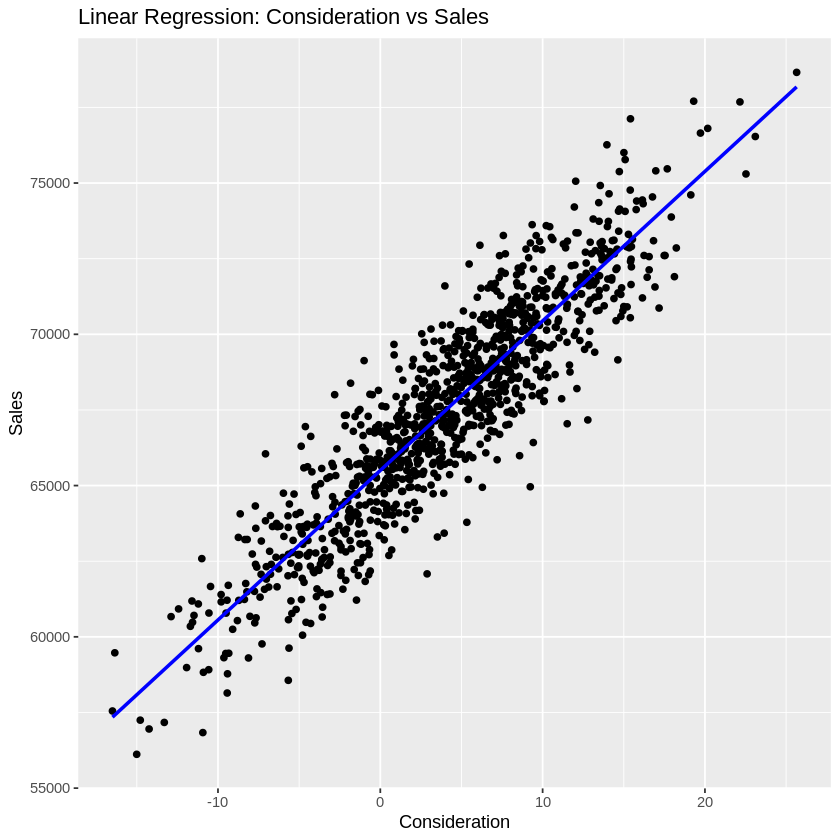

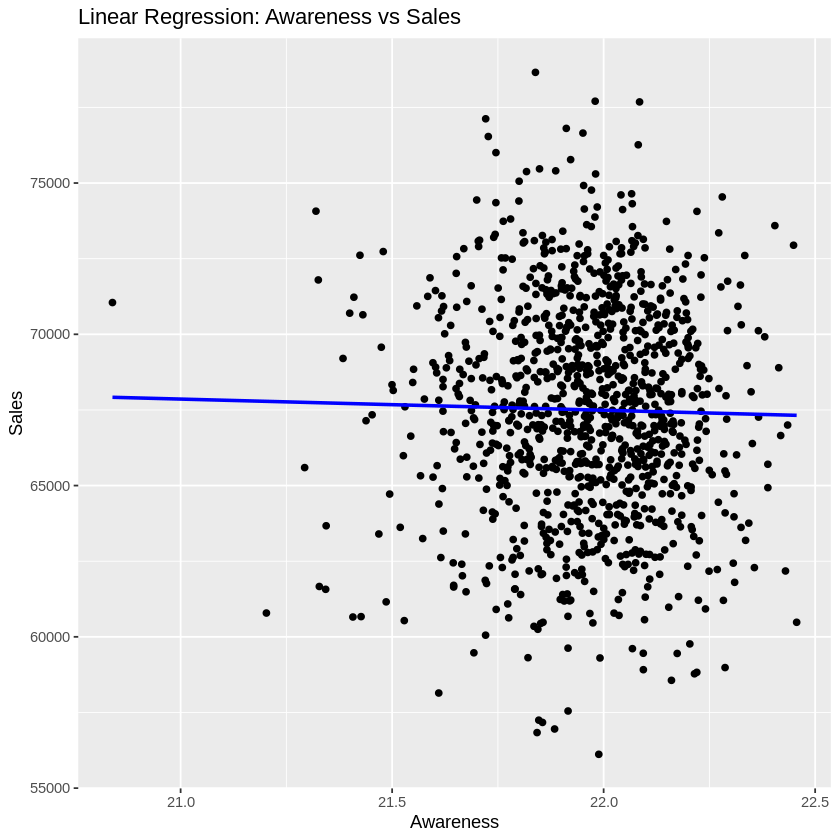

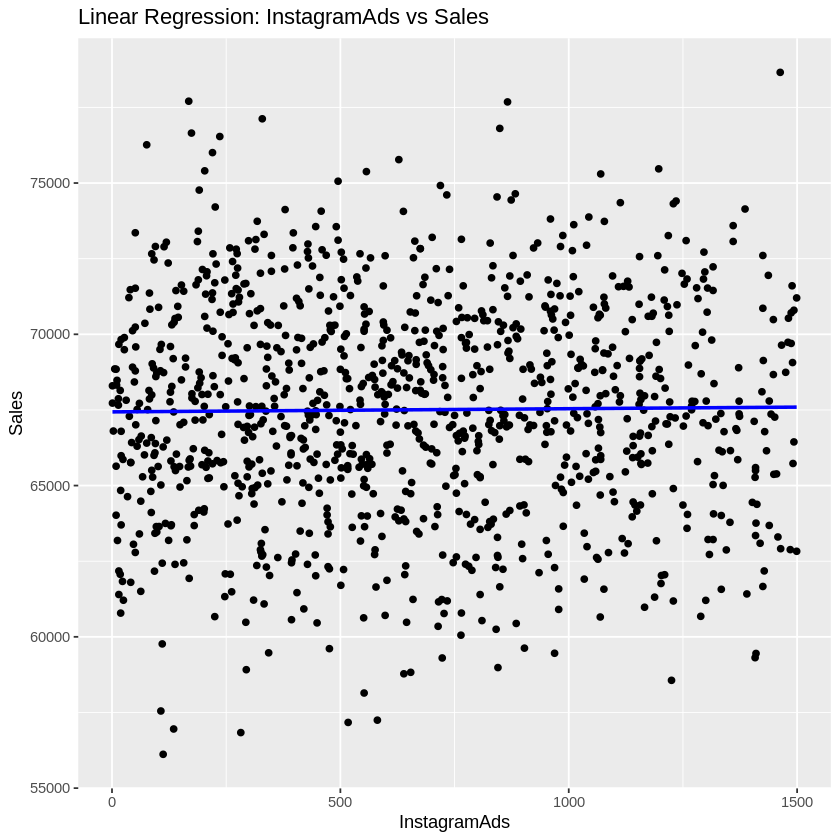

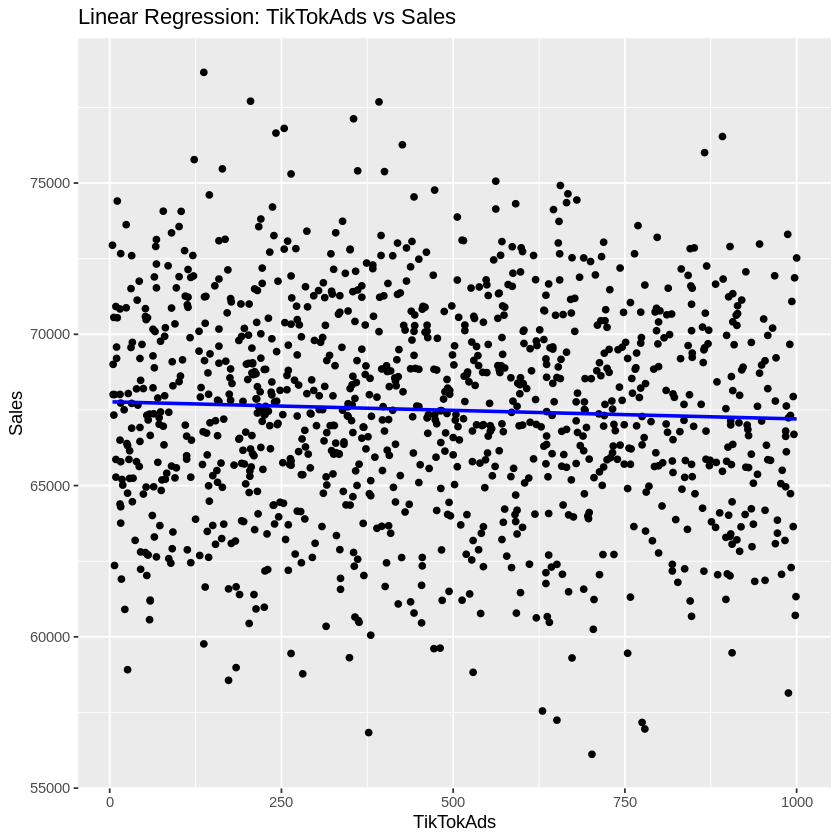

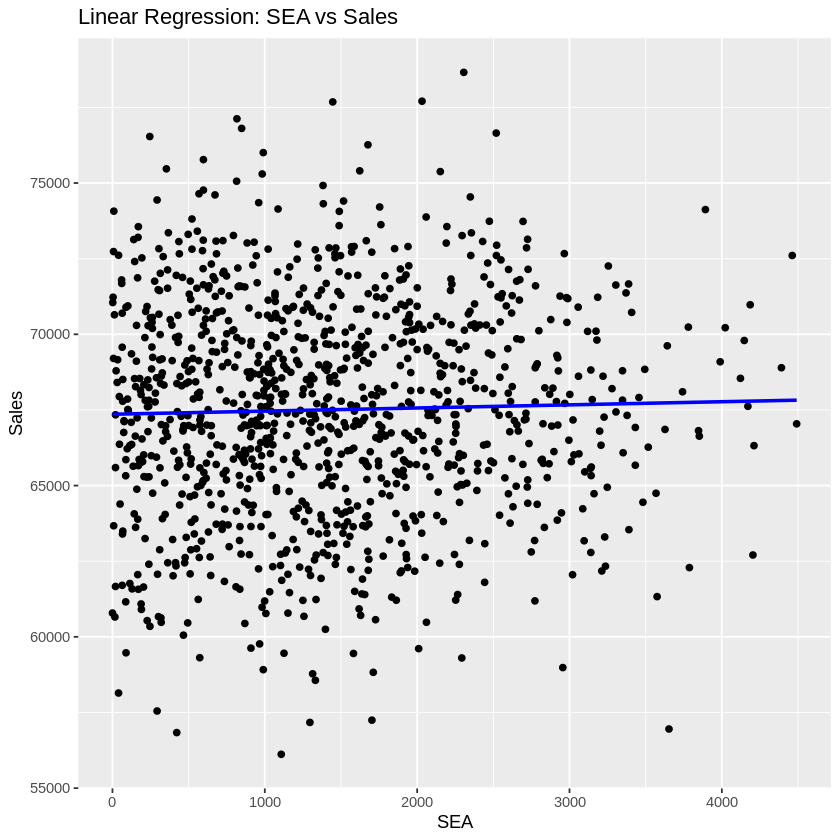

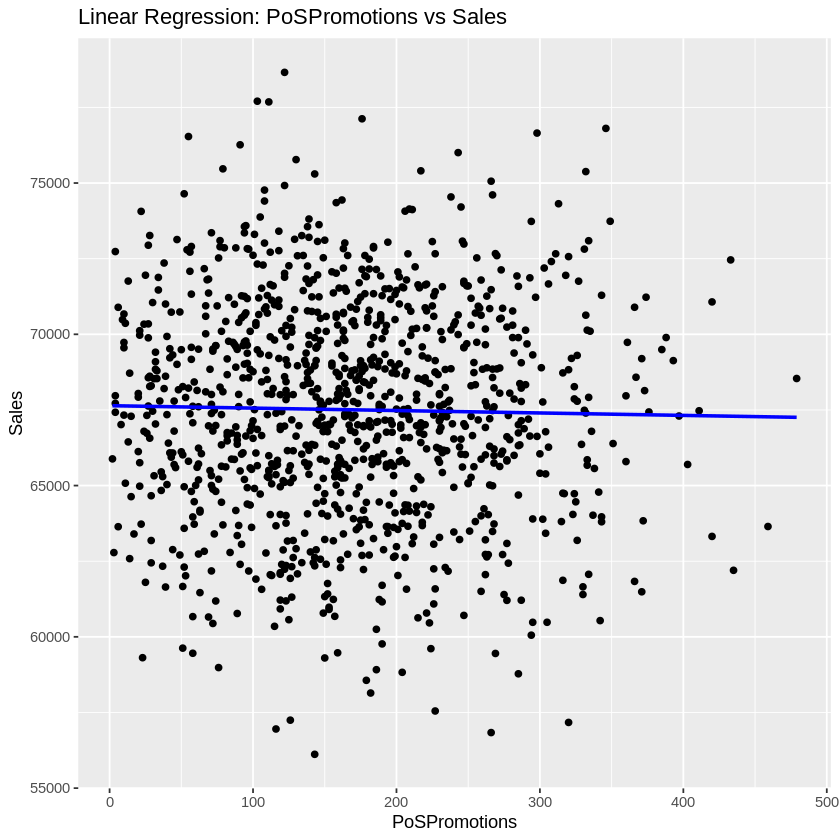

[1] "Variables vs variables"


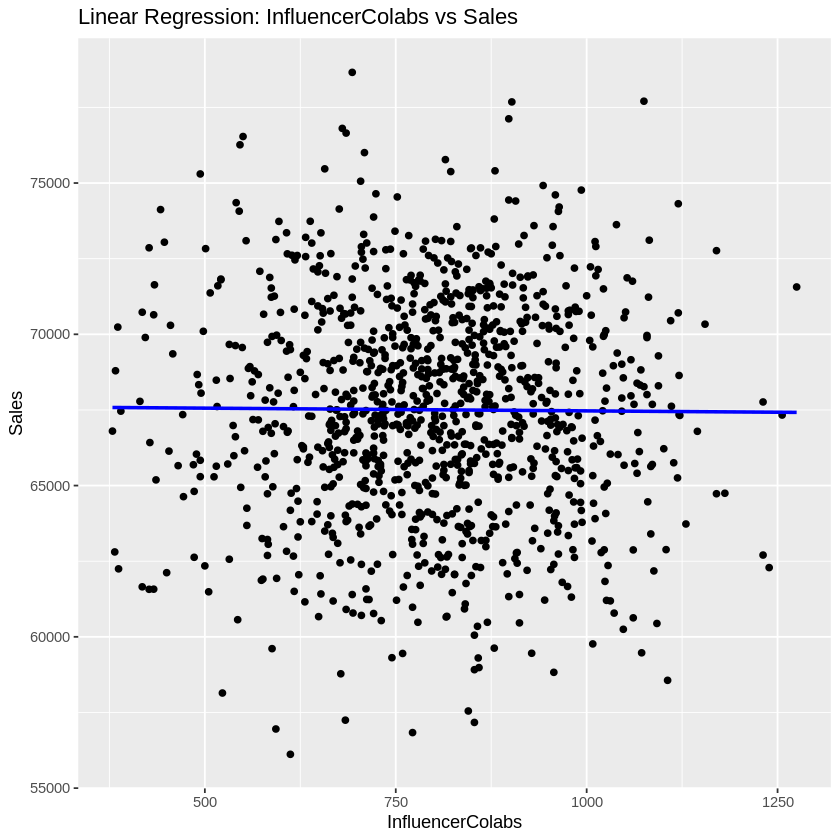

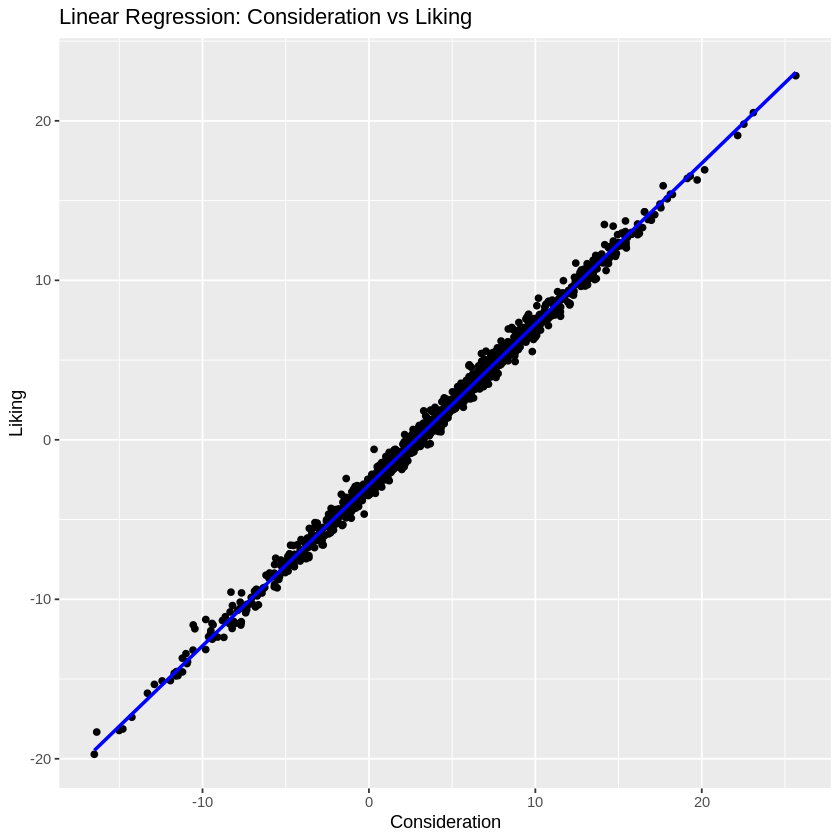

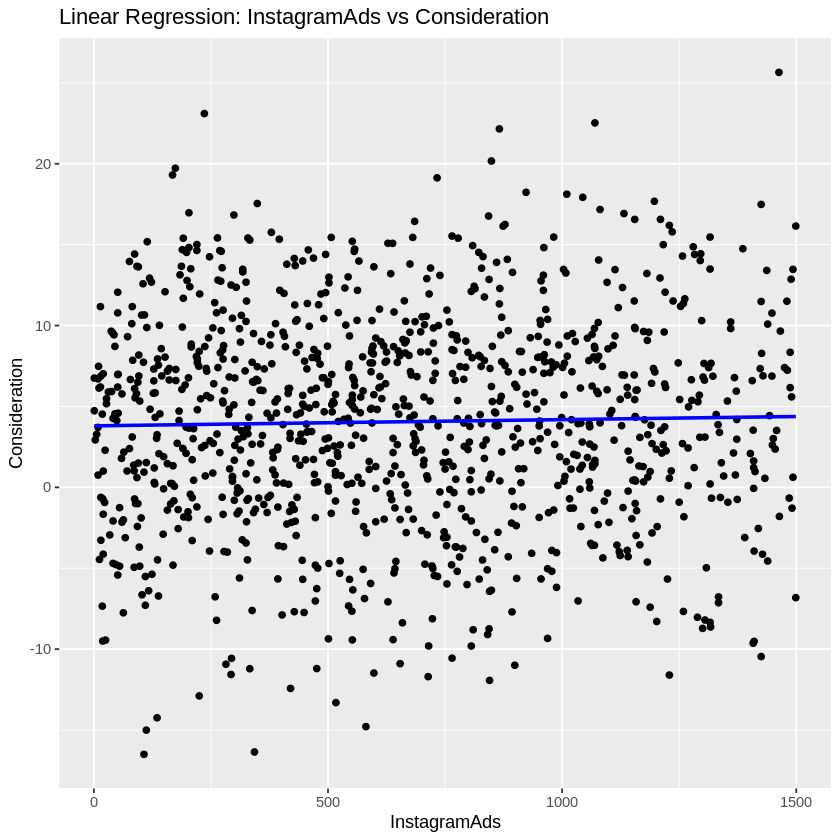

In [ ]:
# Load necessary libraries
library(ggplot2)   # Data visualization

# Function to fit linear regression, return summary, and plot data
fit_and_plot_lm <- function(dependent_var, independent_var, data, print_summary = FALSE) {
  # Fit linear regression model
  lm_model <- lm(paste(dependent_var, "~", independent_var), data = data)

  # Optionally print the summary
  if (print_summary) {
    print(summary(lm_model))
  }

  # Plot the data points and regression line
  ggplot(data, aes_string(x = independent_var, y = dependent_var)) +
    geom_point() +
    geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue") +
    labs(title = paste("Linear Regression:", independent_var, "vs", dependent_var),
         x = independent_var,
         y = dependent_var) +
    scale_x_continuous() +
    scale_y_continuous()
}

print("Sales vs variables")

fit_and_plot_lm("Sales", "Liking", MindSetDF)
fit_and_plot_lm("Sales", "Consideration", MindSetDF)
fit_and_plot_lm("Sales", "Awareness", MindSetDF)
fit_and_plot_lm("Sales", "InstagramAds", MindSetDF)
fit_and_plot_lm("Sales", "TikTokAds", MindSetDF)
fit_and_plot_lm("Sales", "SEA", MindSetDF)
fit_and_plot_lm("Sales", "PoSPromotions", MindSetDF)
fit_and_plot_lm("Sales", "InfluencerColabs", MindSetDF)

print("Variables vs variables")

fit_and_plot_lm("Liking", "Consideration", MindSetDF)
fit_and_plot_lm("Consideration", "InstagramAds", MindSetDF)




# Standardisation

In [ ]:
# Standardize all columns (including non-numeric columns)
standardized_data <- scale(MindSetDF)

# Convert the result back to a dataframe
standardized_data <- as.data.frame(standardized_data)

# View the first few rows of the standardized data
head(standardized_data)


,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs,Time
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.04663954,-2.6196141,0.62718544,0.4132900,-0.89600381,0.02597994,-1.5170366,0.7365662,-0.42969176,-1.729690
2,-0.20262629,-0.0741419,0.52762624,0.4332748,1.89573951,1.29824875,-1.2875736,-0.2255713,1.05896297,-1.726542
3,-1.53826865,-1.5138718,-1.45341287,-1.4885546,-0.53713610,1.55840456,-1.1098205,-1.3251570,-0.96508513,-1.723395
4,1.35992556,0.2368832,1.39513222,1.3184557,-1.33654487,-0.32683410,1.1147858,-1.4969673,0.04040973,-1.720247
5,-1.03602629,-0.1815398,-0.87455485,-0.8141528,-0.04957099,0.44650577,-0.1801182,1.6757957,-0.74309276,-1.717099
6,-0.32515388,0.2063542,-0.07544478,-0.1529676,-0.40101386,1.10224095,-0.7995606,1.3436292,0.18405186,-1.713951


# Logistic regression model

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




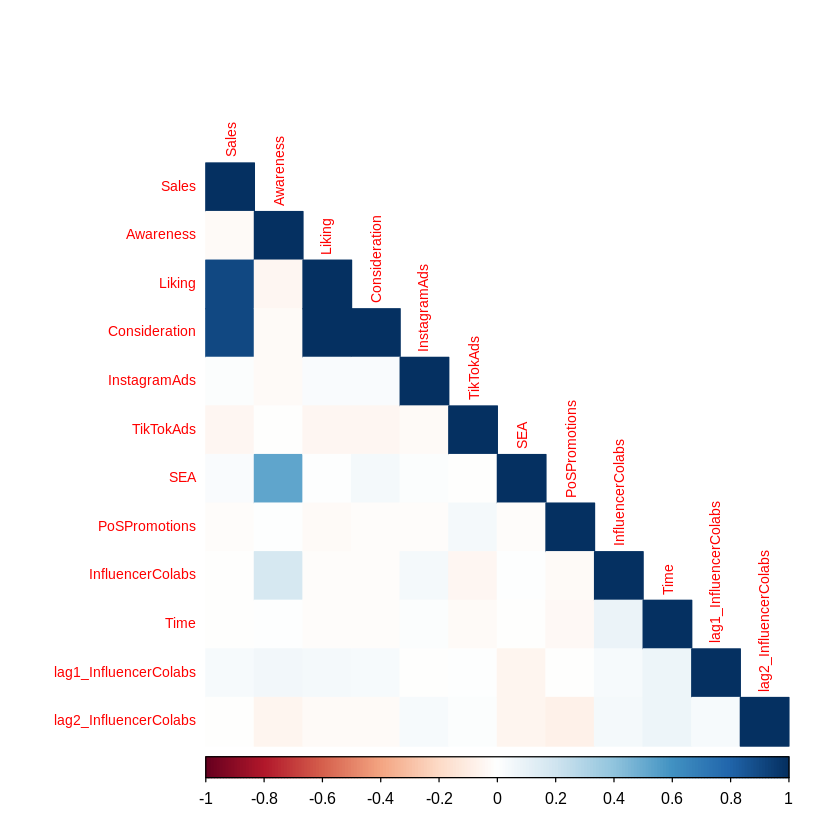

In [ ]:
# Creating lag variables

install.packages("Hmisc")
library(Hmisc)

data_lagged = MindSetDF

data_lagged$lag1_InfluencerColabs <- Lag(data_lagged$InfluencerColabs, +1)
data_lagged$lag2_InfluencerColabs <- Lag(data_lagged$InfluencerColabs, +2)

data_lagged <- na.omit(data_lagged)

# Compute correlations
correlation_matrix <- cor(data_lagged)

# Print the correlation matrix
# Plot the correlation matrix
corrplot(correlation_matrix, method = "color", type = "lower", tl.cex = 0.7)



In [ ]:
# data = MindSetDF
data = standardized_data

# Generate random indices for training and testing sets
index <- sample(1:nrow(data), size = 0.7 * nrow(data))

# Create training and testing sets
train_data <- data[index, ]
test_data <- data[-index, ]

In [ ]:
# Import nnet to for logit model
library(nnet)


# Basic LM model
formula = "Sales ~  Awareness + Liking + Consideration + InstagramAds + TikTokAds + SEA + PoSPromotions + InfluencerColabs"
lm_model = lm(formula, train_data)

summary(lm_model)

#out = data.frame(Sales = train_data$Sales )
#out$probs  = predict(object = prob.model, newdata = newdata, type = "probs")
#out$predicted_sales = predict(object = lm_model, newdata = train_data)
#out$score  = out$probs * out$amount




Call:
lm(formula = formula, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4390 -0.2704 -0.0042  0.2761  1.1777 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.013389   0.015469   0.866    0.387    
Awareness         0.000916   0.019112   0.048    0.962    
Liking           -0.221557   0.269160  -0.823    0.411    
Consideration     1.128197   0.269208   4.191 3.11e-05 ***
InstagramAds     -0.013794   0.015500  -0.890    0.374    
TikTokAds        -0.017309   0.015490  -1.117    0.264    
SEA              -0.006383   0.020121  -0.317    0.751    
PoSPromotions    -0.010730   0.015895  -0.675    0.500    
InfluencerColabs -0.002207   0.015785  -0.140    0.889    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4284 on 761 degrees of freedom
Multiple R-squared:  0.8206,	Adjusted R-squared:  0.8187 
F-statistic: 435.2 on 8 and 761 DF,  p-value: < 2.2e-16


In [ ]:

# Make predictions on the test set
predictions <- predict(lm_model, newdata = test_data)

# Calculate R-squared (R2) score using caret's postResample function
scores <- postResample(predictions, test_data$Sales)

# Print the R2 score
cat("RMSE :", scores[1], "\n")
cat("R-squared (R2) Score:", scores[2], "\n")
cat("MAE:", scores[3], "\n")

RMSE : 0.4111927 
R-squared (R2) Score: 0.8262426 
MAE: 0.3251328 


In [ ]:
predictions <- predict(lm_model, data)
data$predicted_sales <- predictions
head(data)

# Save the data to csv file
write.csv(data, "mindSetPredictions.csv", row.names = FALSE)


,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs,Time,predicted_sales
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.04663954,-2.6196141,0.62718544,0.4132900,-0.89600381,0.02597994,-1.5170366,0.7365662,-0.42969176,-1.729690,0.3529412
2,-0.20262629,-0.0741419,0.52762624,0.4332748,1.89573951,1.29824875,-1.2875736,-0.2255713,1.05896297,-1.726542,0.3449221
3,-1.53826865,-1.5138718,-1.45341287,-1.4885546,-0.53713610,1.55840456,-1.1098205,-1.3251570,-0.96508513,-1.723395,-1.3414996
4,1.35992556,0.2368832,1.39513222,1.3184557,-1.33654487,-0.32683410,1.1147858,-1.4969673,0.04040973,-1.720247,1.2249322
5,-1.03602629,-0.1815398,-0.87455485,-0.8141528,-0.04957099,0.44650577,-0.1801182,1.6757957,-0.74309276,-1.717099,-0.7337740
6,-0.32515388,0.2063542,-0.07544478,-0.1529676,-0.40101386,1.10224095,-0.7995606,1.3436292,0.18405186,-1.713951,-0.1655510


# Model weights

In [ ]:
# Extract coefficients from the linear model
coefficients <- coef(lm_model)

# Format coefficients using sprintf
formatted_coefficients <- sprintf("%-20s %10.3f", names(coefficients), coefficients)

# Display the formatted coefficients
cat(formatted_coefficients, sep = "\n")



(Intercept)               0.013
Awareness                 0.001
Liking                   -0.222
Consideration             1.128
InstagramAds             -0.014
TikTokAds                -0.017
SEA                      -0.006
PoSPromotions            -0.011
InfluencerColabs         -0.002


# Logistic regression model 2 = Consideration

In [ ]:
# Import nnet to for logit model
library(nnet)


# Basic LM model
formula = "Consideration ~ Awareness + InstagramAds + TikTokAds + SEA + PoSPromotions + InfluencerColabs"
lm_model = lm(formula, train_data)

summary(lm_model)

out = data.frame(Sales = train_data$Sales )
#out$probs  = predict(object = prob.model, newdata = newdata, type = "probs")
out$predicted_sales = predict(object = lm_model, newdata = train_data)
#out$score  = out$probs * out$amount


Call:
lm(formula = formula, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.02652 -0.67012  0.06721  0.67951  3.03351 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)       0.023445   0.036233   0.647    0.518
Awareness        -0.054551   0.043928  -1.242    0.215
InstagramAds      0.037792   0.036211   1.044    0.297
TikTokAds        -0.042245   0.036261  -1.165    0.244
SEA               0.058773   0.042987   1.367    0.172
PoSPromotions    -0.043400   0.036474  -1.190    0.234
InfluencerColabs -0.008239   0.036944  -0.223    0.824

Residual standard error: 1.004 on 763 degrees of freedom
Multiple R-squared:  0.008243,	Adjusted R-squared:  0.0004437 
F-statistic: 1.057 on 6 and 763 DF,  p-value: 0.3871


In [ ]:
# Make predictions on the test set
predictions <- predict(lm_model, newdata = test_data)

# Calculate R-squared (R2) score using caret's postResample function
scores <- postResample(predictions, test_data$Consideration)

# Print the R2 score
cat("RMSE :", scores[1], "\n")
cat("R-squared (R2) Score:", scores[2], "\n")
cat("MAE:", scores[3], "\n")

RMSE : 0.992695 
R-squared (R2) Score: 0.001631918 
MAE: 0.7868193 


# Forecasting model ARIMA

In [ ]:
# Create a sequence of dates
start_date <- as.Date("2020-01-01")  # Replace with your desired start date
n_days <- nrow(MindSetDF)  # Assuming you want the same number of days as rows in your dataframe
date_sequence <- seq(start_date, by = "1 day", length.out = n_days)

# Add the 'Date' column to the dataframe
MindSetDF$Date <- date_sequence

# View the updated dataframe
head(MindSetDF)

,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs,Time,Date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<date>
1,67339.33,21.45271,5.410019,6.761116,301,473,20,233,733,1,2020-01-01
2,66782.95,21.94404,4.751098,6.891903,1429,830,233,149,961,2,2020-01-02
3,62018.96,21.66614,-8.360183,-5.685113,446,903,398,53,651,3,2020-01-03
4,72356.29,22.00408,10.492587,12.684786,123,374,2463,38,805,4,2020-01-04
5,63810.37,21.92331,-4.529078,-1.271630,643,591,1261,315,685,5,2020-01-05
6,66345.92,21.99818,0.759741,3.055361,501,775,686,286,827,6,2020-01-06


In [ ]:
# Load necessary libraries
install.packages("forecast")
library(forecast)

# Assuming 'MindSetDF' is your dataframe with a 'Date' column and 'Sales' column
# Replace 'Date' and 'Sales' with your actual column names

# Convert 'Date' to a time series
ts_data <- ts(MindSetDF$Sales, frequency = 1)

# Fit an ARIMA model
arima_model <- auto.arima(ts_data)

# Forecast sales for the next 100 days
forecast_values <- forecast(arima_model, h = 10)

print(forecast_values)
# Extract the forecasted values
simulated_sales <- forecast_values$mean

# View the simulated sales for the next 100 days
print(simulated_sales)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1101       67505.68 62934.62 72076.75 60514.85 74496.52
1102       67505.68 62934.62 72076.75 60514.85 74496.52
1103       67505.68 62934.62 72076.75 60514.85 74496.52
1104       67505.68 62934.62 72076.75 60514.85 74496.52
1105       67505.68 62934.62 72076.75 60514.85 74496.52
1106       67505.68 62934.62 72076.75 60514.85 74496.52
1107       67505.68 62934.62 72076.75 60514.85 74496.52
1108       67505.68 62934.62 72076.75 60514.85 74496.52
1109       67505.68 62934.62 72076.75 60514.85 74496.52
1110       67505.68 62934.62 72076.75 60514.85 74496.52
Time Series:
Start = 1101 
End = 1110 
Frequency = 1 
 [1] 67505.68 67505.68 67505.68 67505.68 67505.68 67505.68 67505.68 67505.68
 [9] 67505.68 67505.68




We can print this into the dashboard.

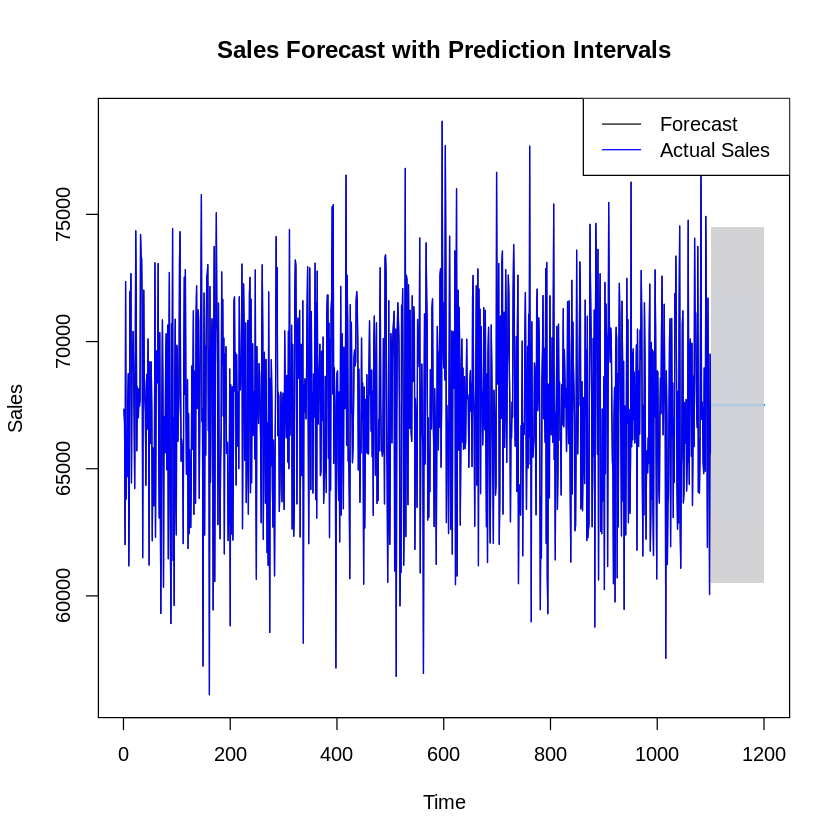

In [ ]:
# Assuming 'MindSetDF' is your dataframe with a 'Date' column and 'Sales' column
# Replace 'Date' and 'Sales' with your actual column names

# Convert 'Date' to a time series
ts_data <- ts(MindSetDF$Sales, frequency = 1)

# Fit an ARIMA model
arima_model <- auto.arima(ts_data)

# Forecast sales for the next 100 days with prediction intervals
forecast_values <- forecast(arima_model, h = 100, level = c(80, 95))

# Plot the forecast
plot(forecast_values, main = "Sales Forecast with Prediction Intervals", xlab = "Time", ylab = "Sales")

# Add actual past data
lines(ts_data, col = "blue", lty = 1)

# Add legend
legend("topright", legend = c("Forecast", "Actual Sales"), col = c("black", "blue"), lty = c(1, 1))

# Add prediction intervals
polygon(c(time(forecast_values$lower[, 2]), rev(time(forecast_values$upper[, 2]))),
        c(forecast_values$lower[, 2], rev(forecast_values$upper[, 2])),
        col = rgb(0.8, 0.8, 0.8, 0.5), border = NA)
polygon(c(time(forecast_values$lower[, 1]), rev(time(forecast_values$upper[, 1]))),
        c(forecast_values$lower[, 1], rev(forecast_values$upper[, 1])),
        col = rgb(0.9, 0.9, 0.9, 0.5), border = NA)


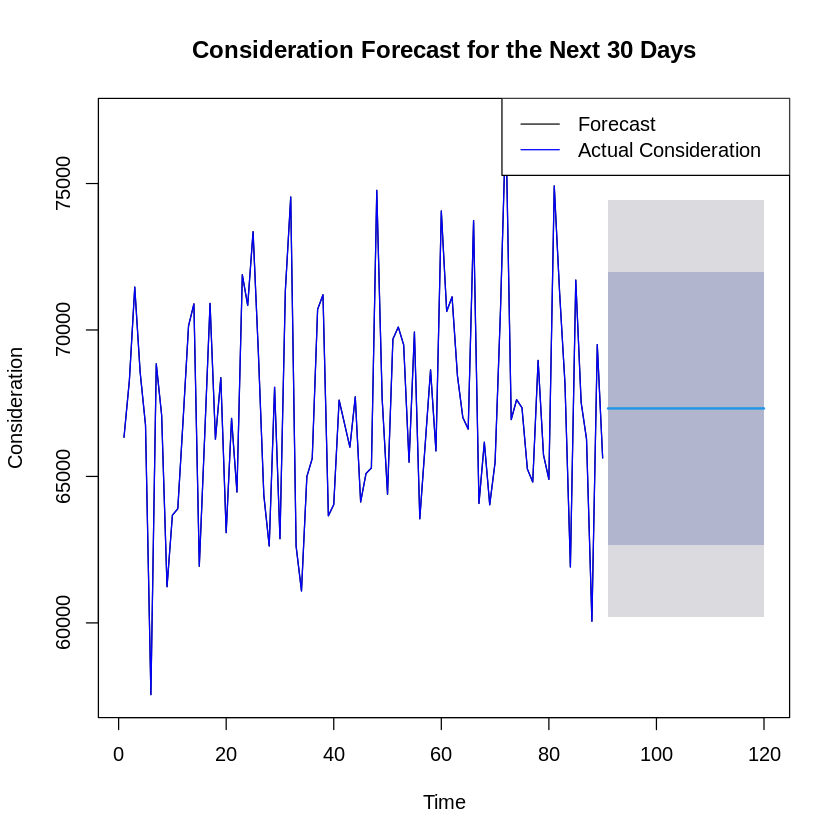

In [ ]:
# Assuming 'MindSetDF' is your dataframe with a 'Date' column and 'Consideration' column
# Replace 'Date' and 'Consideration' with your actual column names

# Extract the last 90 days of 'Consideration' data
last_90_days <- tail(MindSetDF$Sales, 90)

# Convert 'Date' to a time series
ts_data <- ts(last_90_days, frequency = 1)

# Fit an ARIMA model
arima_model <- auto.arima(ts_data)

# Forecast 'Consideration' for the next 30 days
forecast_values <- forecast(arima_model, h = 30, level = c(80, 95))

# Plot the forecast
plot(forecast_values, main = "Consideration Forecast for the Next 30 Days", xlab = "Time", ylab = "Consideration")

# Add actual past data
lines(ts_data, col = "blue", lty = 1)

# Add legend
legend("topright", legend = c("Forecast", "Actual Consideration"), col = c("black", "blue"), lty = c(1, 1))


# EDA : monthly data

In [1]:
# Load necessary libraries
install.packages("dplyr")
library(dplyr)

# Convert 'Date' to Date format if it's not already
MindSetDF$Date <- as.Date(MindSetDF$Date)

# Create a new dataframe with monthly totals
MonthlyDF <- MindSetDF %>%
  group_by(YearMonth = format(Date, "%Y-%m")) %>%
  summarize(
    sum_Sales = sum(Sales),
    avg_Awareness = mean(Awareness),
    avg_Liking = mean(Liking),
    avg_Consideration = mean(Consideration),
    sum_InstagramAds = sum(InstagramAds),
    sum_TikTokAds = sum(TikTokAds),
    sum_SEA = sum(SEA),
    sum_PoSPromotions = sum(PoSPromotions),
    sum_InfluencerColabs = sum(InfluencerColabs),
    # Add additional columns as needed
    .groups = 'drop'
  )

# View the transformed dataframe
head(MonthlyDF)

# Remove the last row
MonthlyDF <- MonthlyDF[-nrow(MonthlyDF), ]

tail(MonthlyDF)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in eval(expr, envir, enclos): object 'MindSetDF' not found


Correlation matrix

,sum_Sales,avg_Awareness,avg_Liking,avg_Consideration,sum_InstagramAds,sum_TikTokAds,sum_SEA,sum_PoSPromotions,sum_InfluencerColabs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7573843,-0.60490631,1.6339949,1.4574857,-0.3227648,1.1901561,-0.8074820,-0.63930967,-0.3964395
2,-1.5499049,0.54003223,0.2009184,0.4005018,-2.3406036,-2.2382844,1.0530460,0.69467205,-1.8742243
3,0.1839677,-1.48809630,-2.0309046,-2.0899386,0.2670650,0.3768736,-1.0884791,-0.97676855,-0.7936848
4,-0.5744460,-0.77706930,-0.1494969,-0.1637859,0.9979328,1.0352765,-0.9728500,0.30059256,-0.1442331
5,0.5333894,0.01802913,0.1034626,0.1726004,-2.4360341,0.5304351,0.8038010,0.03107843,-0.2360910
6,-0.2366025,0.53715425,0.3706124,0.3943392,-0.3825526,1.7035654,0.5652012,0.18961615,-1.9153186


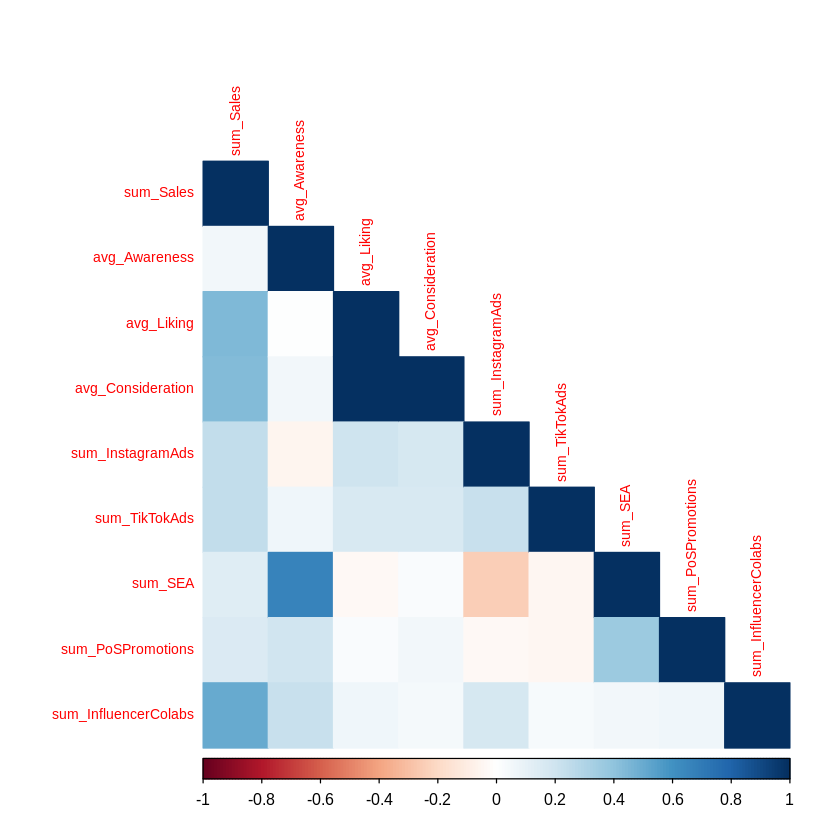

In [ ]:
library(corrplot)

MonthlyDF <- MonthlyDF %>%
  select_if(is.numeric)

# Standardize all columns (including non-numeric columns)
scaled_MonthlyDF <- scale(MonthlyDF)

# Convert the result back to a dataframe
scaled_MonthlyDF <- as.data.frame(scaled_MonthlyDF)

# View the first few rows of the standardized data
head(scaled_MonthlyDF)


# Calculate the correlation matrix
correlation_matrix <- cor(MonthlyDF)

# Plot the correlation matrix
corrplot(correlation_matrix, method = "color", type = "lower", tl.cex = 0.7)

Regression

[1] "Sales vs variables"


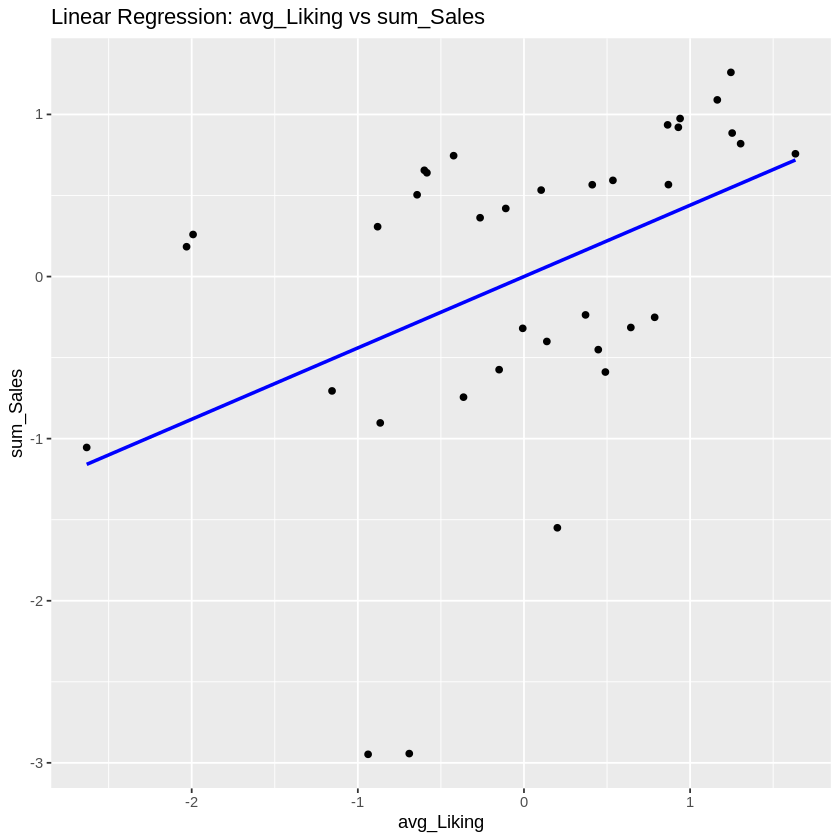

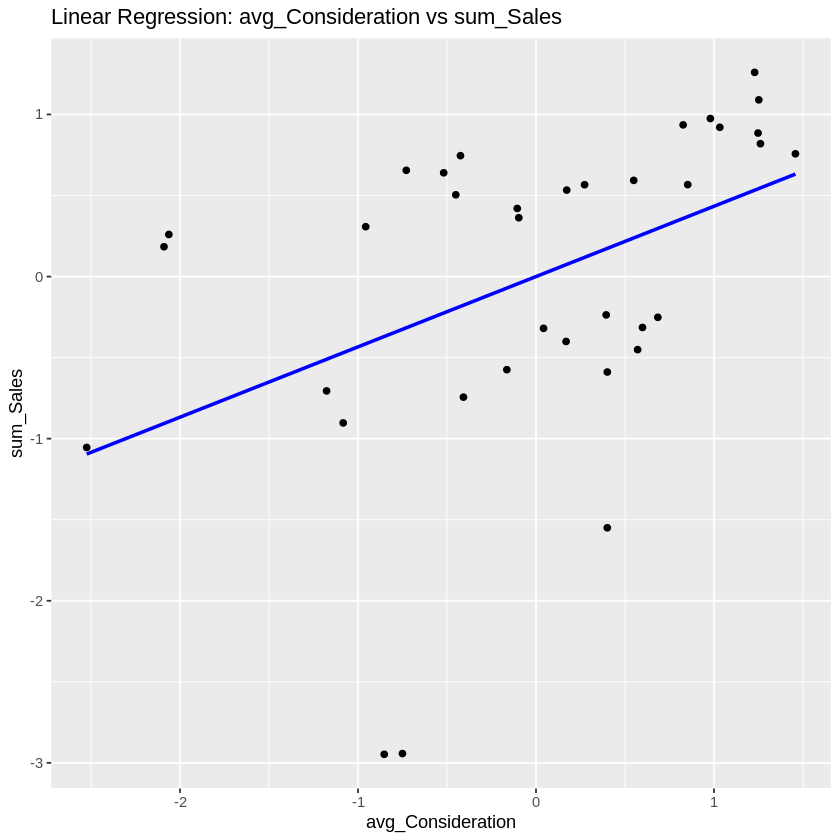

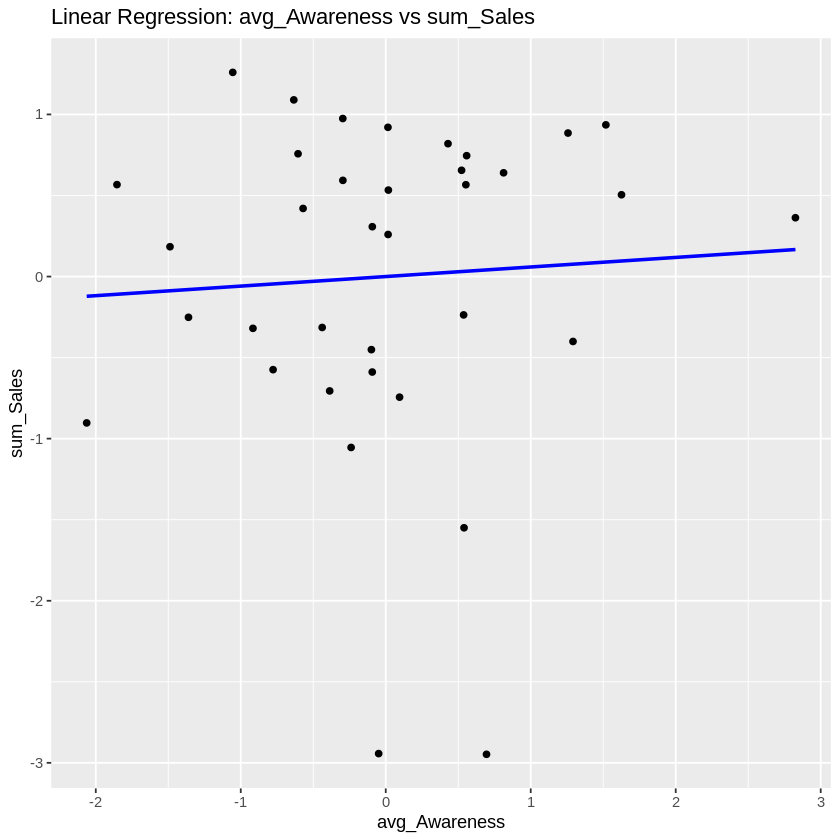

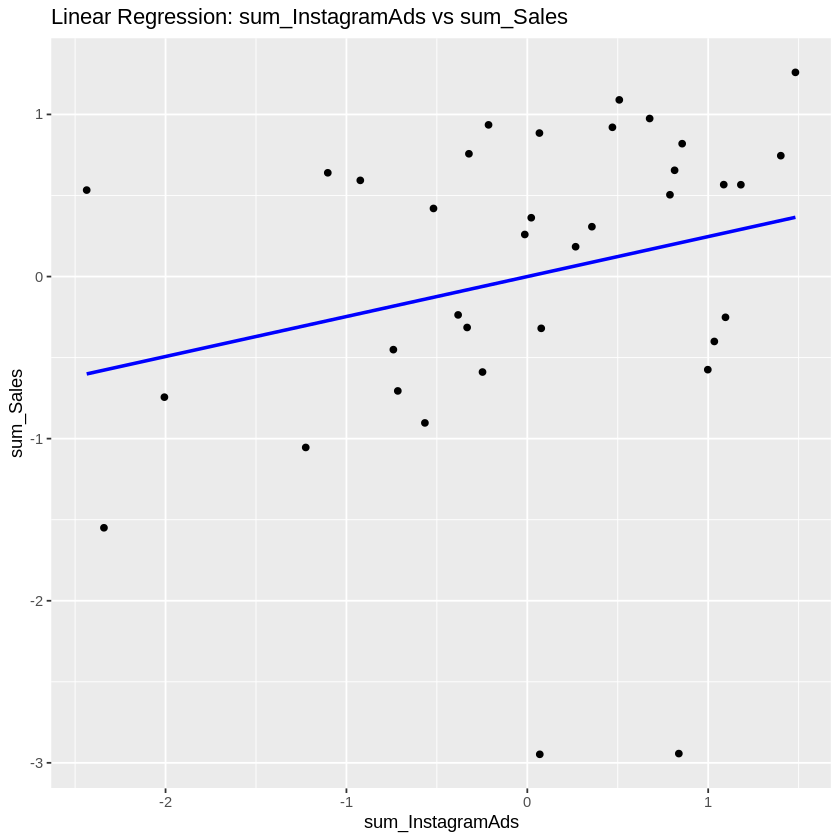

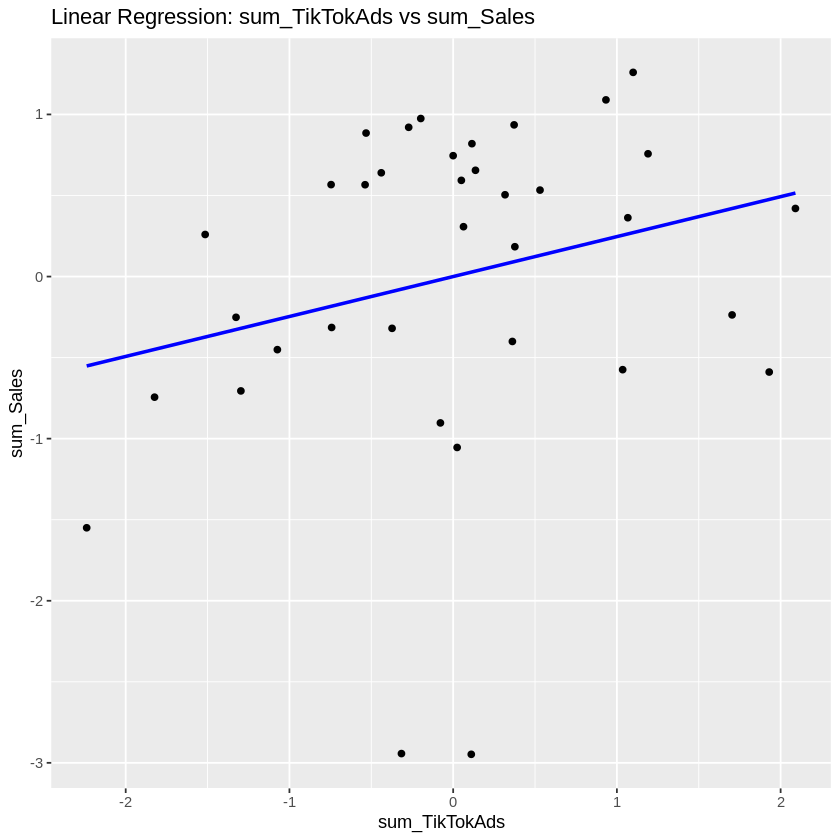

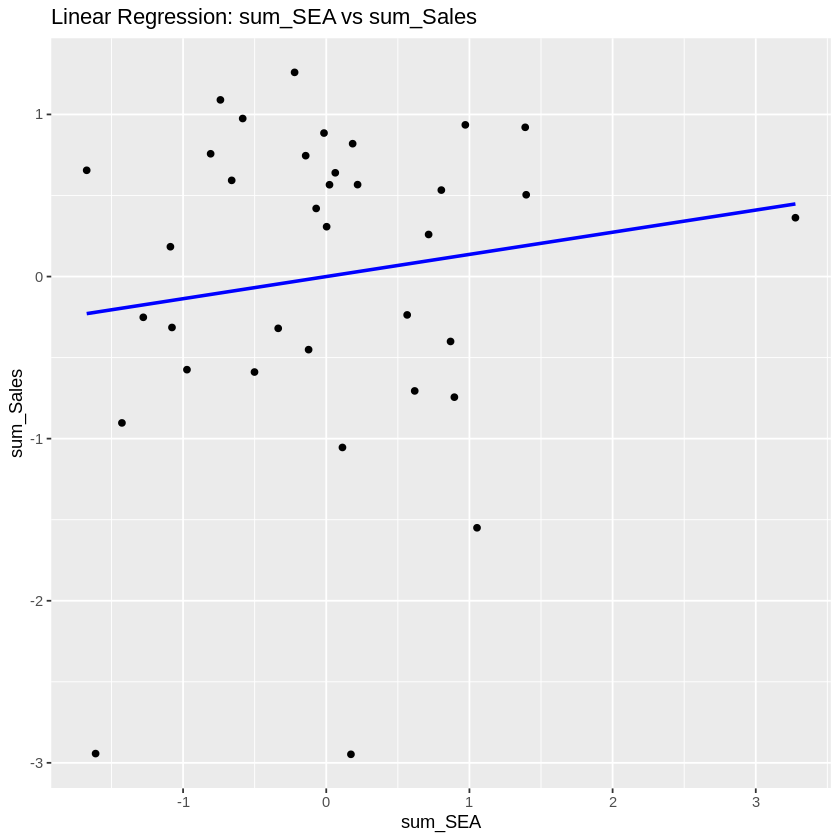

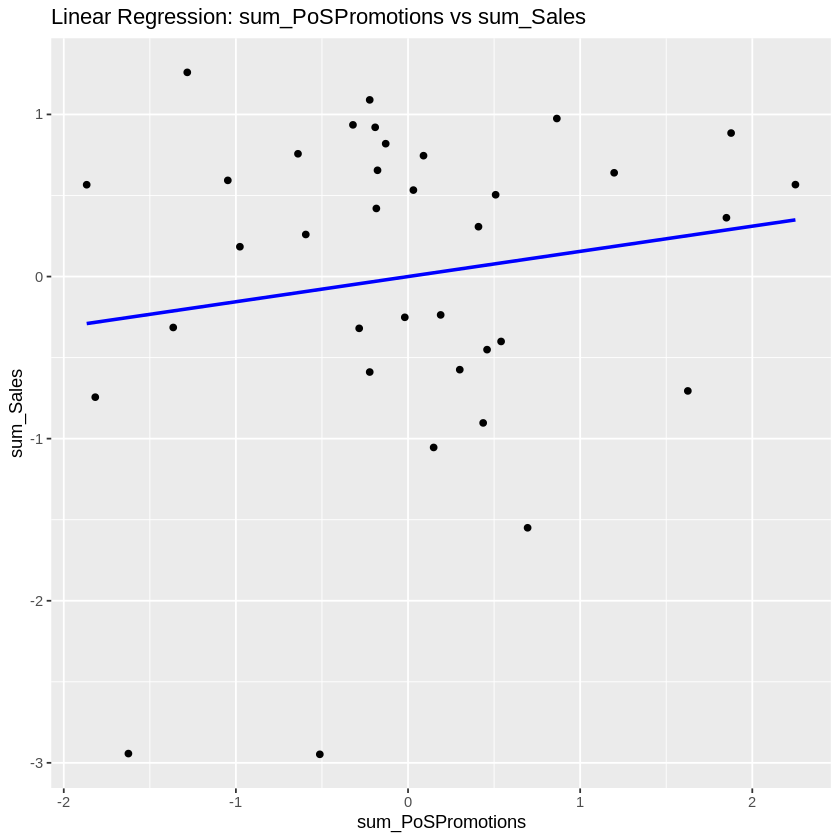

[1] "Variables vs variables"


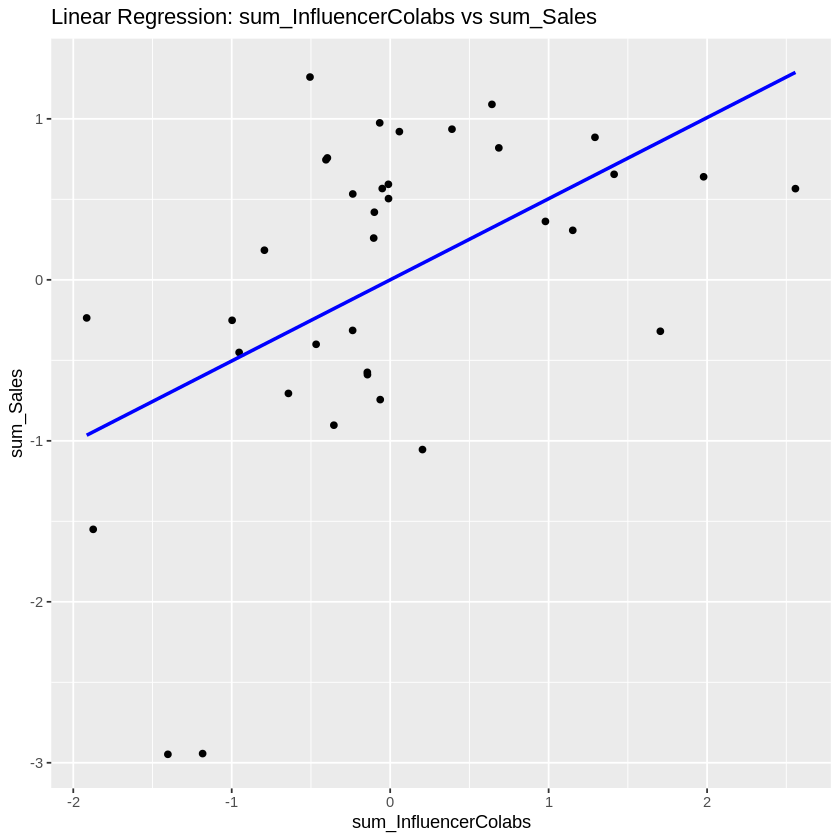

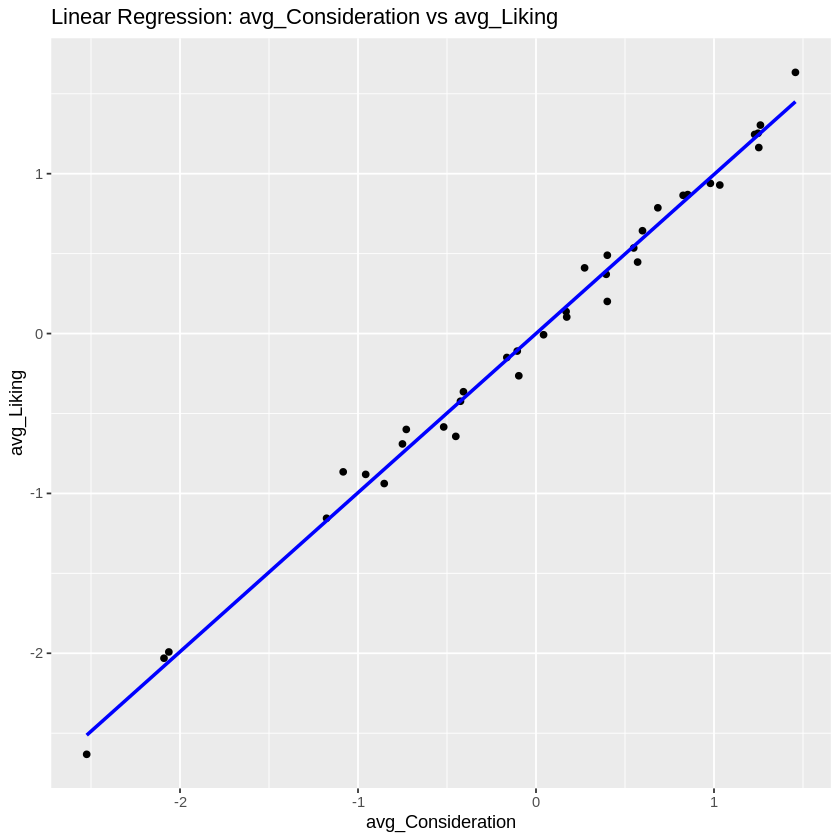

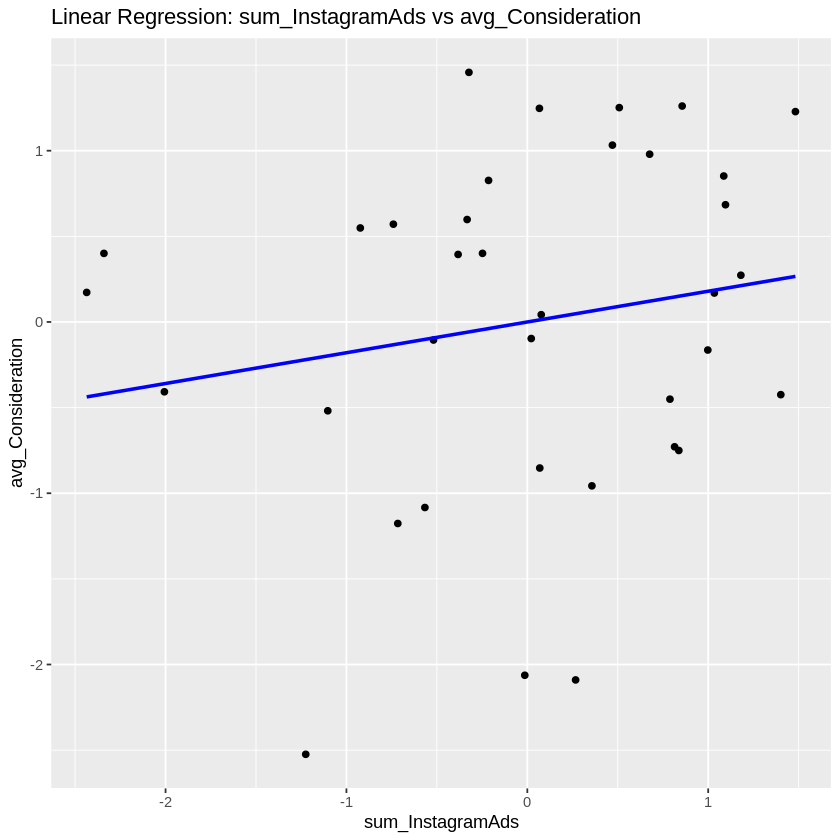

In [ ]:
print("Sales vs variables")

fit_and_plot_lm("sum_Sales", "avg_Liking", scaled_MonthlyDF)
fit_and_plot_lm("sum_Sales", "avg_Consideration", scaled_MonthlyDF)
fit_and_plot_lm("sum_Sales", "avg_Awareness", scaled_MonthlyDF)
fit_and_plot_lm("sum_Sales", "sum_InstagramAds", scaled_MonthlyDF)
fit_and_plot_lm("sum_Sales", "sum_TikTokAds", scaled_MonthlyDF)
fit_and_plot_lm("sum_Sales", "sum_SEA", scaled_MonthlyDF)
fit_and_plot_lm("sum_Sales", "sum_PoSPromotions", scaled_MonthlyDF)
fit_and_plot_lm("sum_Sales", "sum_InfluencerColabs", scaled_MonthlyDF)

print("Variables vs variables")

fit_and_plot_lm("avg_Liking", "avg_Consideration", scaled_MonthlyDF)
fit_and_plot_lm("avg_Consideration", "sum_InstagramAds", scaled_MonthlyDF)


In [ ]:
# data = MindSetDF
data = MonthlyDF

# Generate random indices for training and testing sets
index <- sample(1:nrow(data), size = 0.7 * nrow(data))

# Create training and testing sets
train_data <- data[index, ]
test_data <- data[-index, ]


# Import nnet to for logit model
library(nnet)


# Basic LM model
formula = "sum_Sales ~  sum_InstagramAds + sum_TikTokAds + sum_SEA + sum_PoSPromotions + sum_InfluencerColabs"
lm_model = lm(formula, train_data)

summary(lm_model)

out = data.frame(Sales = train_data$sum_Sales )
#out$probs  = predict(object = prob.model, newdata = newdata, type = "probs")
out$predicted_sales = predict(object = lm_model, newdata = train_data)
#out$score  = out$probs * out$amount



Call:
lm(formula = formula, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-120974  -23836    3500   36598   60423 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)          9.331e+05  2.746e+05   3.398  0.00302 **
sum_InstagramAds     6.499e-01  4.838e+00   0.134  0.89456   
sum_TikTokAds        1.228e+01  8.122e+00   1.511  0.14712   
sum_SEA              2.221e+00  2.526e+00   0.879  0.39014   
sum_PoSPromotions    2.702e+01  2.402e+01   1.125  0.27467   
sum_InfluencerColabs 2.863e+01  8.517e+00   3.362  0.00327 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53100 on 19 degrees of freedom
Multiple R-squared:  0.4848,	Adjusted R-squared:  0.3492 
F-statistic: 3.575 on 5 and 19 DF,  p-value: 0.01903


In [ ]:
head(out)

,Sales,predicted_sales
,<dbl>,<dbl>
1,2089216,2113052
2,2108244,2110518
3,2013303,2030870
4,2120458,2081645
5,2036662,2000064
6,2093612,2127479


In [ ]:
# Make predictions on the test set
predictions <- predict(lm_model, newdata = test_data)

# Calculate R-squared (R2) score using caret's postResample function
scores <- postResample(predictions, test_data$sum_Sales)

# Print the R2 score
cat("RMSE :", scores[1], "\n")
cat("R-squared (R2) Score:", scores[2], "\n")
cat("MAE:", scores[3], "\n")

RMSE : 57085.1 
R-squared (R2) Score: 0.02777233 
MAE: 51437.14 


In [ ]:
# Extract coefficients from the linear model
coefficients <- coef(lm_model)

# Format coefficients using sprintf
formatted_coefficients <- sprintf("%-20s %10.3f", names(coefficients), coefficients)

# Display the formatted coefficients
cat(formatted_coefficients, sep = "\n")

(Intercept)          933117.146
sum_InstagramAds          0.650
sum_TikTokAds            12.276
sum_SEA                   2.221
sum_PoSPromotions        27.019
sum_InfluencerColabs     28.633


Final model

In [ ]:
lm_model = lm(formula, data)
# Save the lm_model to a file
saveRDS(lm_model, file = "lm_model.rds")




Predict consideration & liking with arima

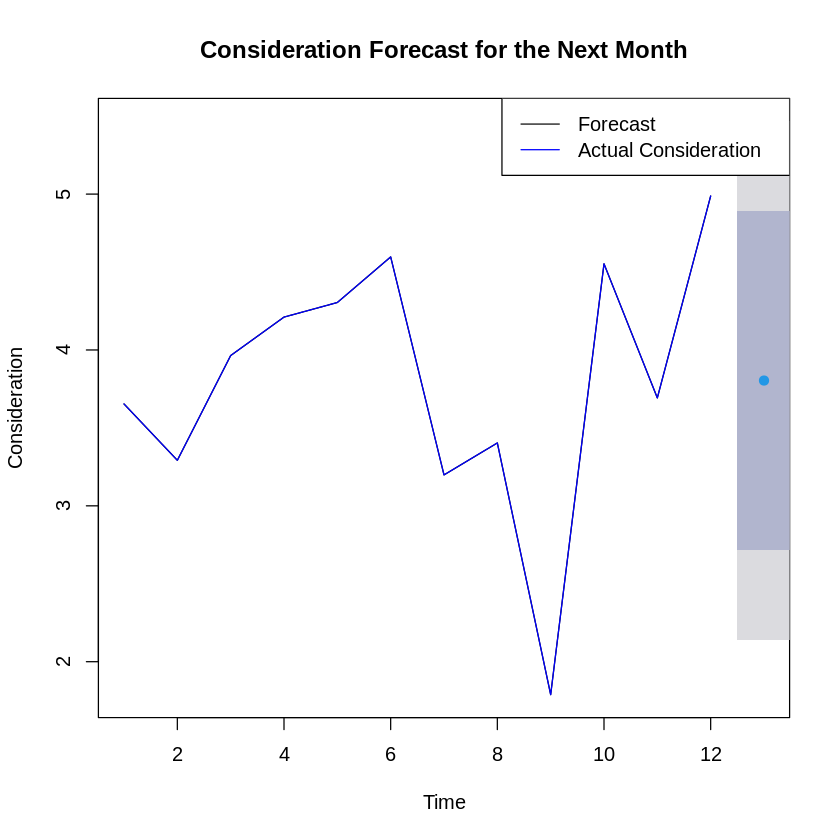

In [ ]:
# Assuming 'MindSetDF' is your dataframe with a 'Date' column and 'Consideration' column
# Replace 'Date' and 'Consideration' with your actual column names

# Extract the last 90 days of 'Consideration' data
last_12_months <- tail(MonthlyDF$avg_Consideration, 12)

# Convert 'Date' to a time series
ts_data <- ts(last_12_months, frequency = 1)

# Fit an ARIMA model
consideration_model <- auto.arima(ts_data)
saveRDS(consideration_model, file = "consideration_model.rds")


# Forecast 'Consideration' for the next 30 days
forecast_consideration <- forecast(consideration_model, h = 1, level = c(80, 95))

# Plot the forecast
plot(forecast_consideration, main = "Consideration Forecast for the Next Month", xlab = "Time", ylab = "Consideration")

# Add actual past data
lines(ts_data, col = "blue", lty = 1)

# Add legend
legend("topright", legend = c("Forecast", "Actual Consideration"), col = c("black", "blue"), lty = c(1, 1))

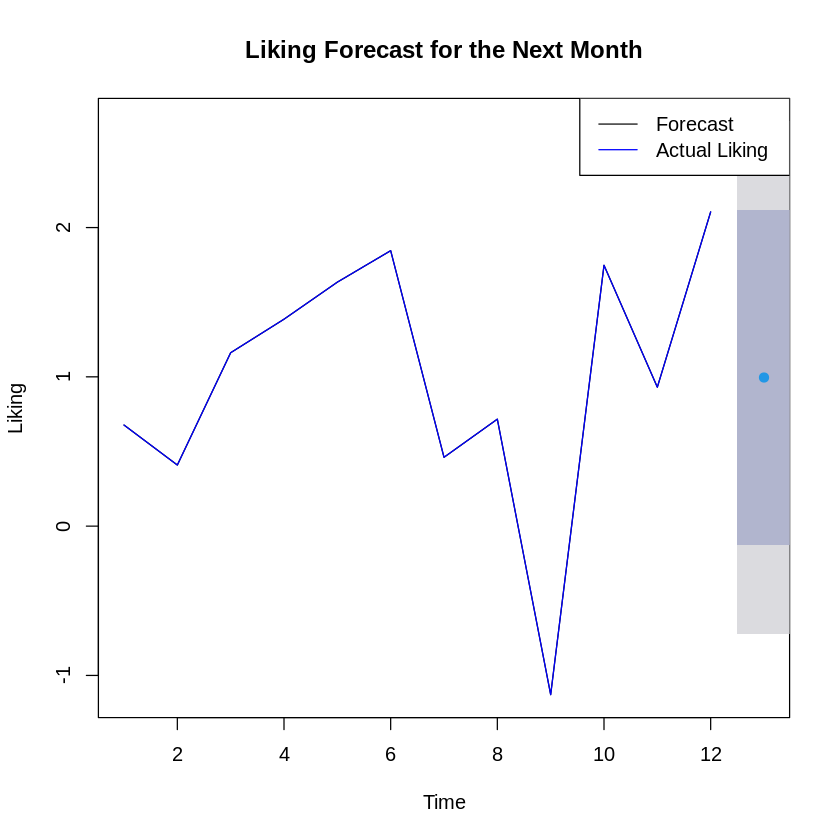

In [ ]:
# Assuming 'MindSetDF' is your dataframe with a 'Date' column and 'Consideration' column
# Replace 'Date' and 'Consideration' with your actual column names

# Extract the last 90 days of 'Consideration' data
last_12_months <- tail(MonthlyDF$avg_Liking, 12)

# Convert 'Date' to a time series
ts_data <- ts(last_12_months, frequency = 1)

# Fit an ARIMA model
liking_model <- auto.arima(ts_data)
saveRDS(liking_model, file = "liking_model.rds")


# Forecast 'Consideration' for the next 30 days
forecast_liking <- forecast(liking_model, h = 1, level = c(80, 95))

# Plot the forecast
plot(forecast_liking, main = "Liking Forecast for the Next Month", xlab = "Time", ylab = "Liking")

# Add actual past data
lines(ts_data, col = "blue", lty = 1)

# Add legend
legend("topright", legend = c("Forecast", "Actual Liking"), col = c("black", "blue"), lty = c(1, 1))

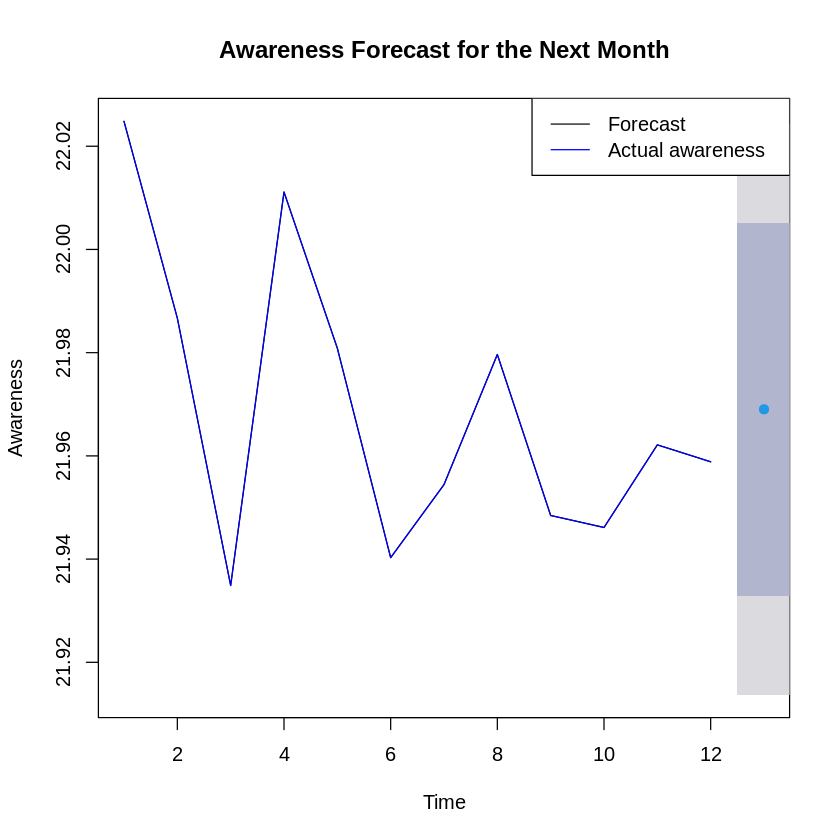

In [ ]:
# Assuming 'MindSetDF' is your dataframe with a 'Date' column and 'Consideration' column
# Replace 'Date' and 'Consideration' with your actual column names

# Extract the last 90 days of 'Consideration' data
last_12_months <- tail(MonthlyDF$avg_Awareness, 12)

# Convert 'Date' to a time series
ts_data <- ts(last_12_months, frequency = 1)

# Fit an ARIMA model
awareness_model <- auto.arima(ts_data)
saveRDS(awareness_model, file = "awareness_model.rds")


# Forecast 'Consideration' for the next 30 days
forecast_awareness <- forecast(awareness_model, h = 1, level = c(80, 95))

# Plot the forecast
plot(forecast_awareness, main = "Awareness Forecast for the Next Month", xlab = "Time", ylab = "Awareness")

# Add actual past data
lines(ts_data, col = "blue", lty = 1)

# Add legend
legend("topright", legend = c("Forecast", "Actual awareness"), col = c("black", "blue"), lty = c(1, 1))

# Simulation

Simulate consideration and liking for the next 30 days based on the 90 past days. Then used the model in order to predict the

In [ ]:
tail(MonthlyDF)

sum_Sales,avg_Awareness,avg_Liking,avg_Consideration,sum_InstagramAds,sum_TikTokAds,sum_SEA,sum_PoSPromotions,sum_InfluencerColabs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2073764,21.95444,0.4612027,3.198517,21161,14286,43572,5314,25747
2094534,21.97965,0.7166057,3.403650,22354,14397,34441,5055,26071
1992488,21.94845,-1.1289522,1.788574,17033,14227,44174,5199,24570
2090824,21.94612,1.7473197,4.552916,17820,14266,39959,4671,24303
2011004,21.96213,0.9307170,3.692459,14994,11423,48433,4331,24239
2110359,21.95885,2.1049330,4.987923,21457,13778,51129,5049,24389


In [ ]:
# Load the lm model
lm_model <- readRDS("lm_model.rds")

# Load the arima models
consideration_model <- readRDS("consideration_model.rds")
liking_model <- readRDS("liking_model.rds")
awareness_model <- readRDS("awareness_model.rds")

# Data
data <- MonthlyDF

# Choose budget

sum_InstagramAds <- c(21457,2500,1900,21457,2500,1900)
sum_TikTokAds <- c(1300,1500,13778,21457,2500,1900)
sum_SEA <- c(51129,51129,51129,21457,2500,1900)
sum_PoSPromotions <- c(5049,5049,5049,21457,2500,1900)
sum_InfluencerColabs <- c(24389,24389,24389,21457,2500,1900)

# Simulation horizon

h <- 6


# Forecast consideration, liking, and awareness for h periods with ARIMA models
forecast_consideration <- forecast(consideration_model, h = h, level = c(80, 95))
forecast_liking <- forecast(liking_model, h = h, level = c(80, 95))
forecast_awareness <- forecast(awareness_model, h = h, level = c(80, 95))

# Combine the forecasted values into the budget matrix
budget_matrix <- cbind(
  forecast_consideration$mean,
  forecast_liking$mean,
  forecast_awareness$mean,
  sum_InstagramAds,
  sum_TikTokAds,
  sum_SEA,
  sum_PoSPromotions,
  sum_InfluencerColabs
)

# Predict the value of Sales based on the projected budget for h periods using the lm model
#out = data.frame()
#out$probs  = predict(object = prob.model, newdata = newdata, type = "probs")
predicted_sales = predict(lm_model, newdata = data.frame(budget_matrix), interval = "prediction")
#out$score  = out$probs * out$amount

predicted_sales <- as.data.frame(predicted_sales)
head(predicted_sales)

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
1,1965887,1770637.4,2161137
2,1902204,1695195.4,2109212
3,1999868,1830278.0,2169457
4,2229465,1463397.5,2995533
5,1330026,942170.7,1717881
6,1301558,899808.7,1703307


# KPI

Brand awareness

In [ ]:
head(MindSetDF,10)
tail(MindSetDF,10)

,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs,Time,Date,TotalAdvertisingSpend
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<date>,<dbl>
1,67339.33,21.45271,5.410019,6.761116,301,473,20,233,733,1,2020-01-01,1760
2,66782.95,21.94404,4.751098,6.891903,1429,830,233,149,961,2,2020-01-02,3602
3,62018.96,21.66614,-8.360183,-5.685113,446,903,398,53,651,3,2020-01-03,2451
4,72356.29,22.00408,10.492587,12.684786,123,374,2463,38,805,4,2020-01-04,3803
5,63810.37,21.92331,-4.529078,-1.271630,643,591,1261,315,685,5,2020-01-05,3495
6,66345.92,21.99818,0.759741,3.055361,501,775,686,286,827,6,2020-01-06,3075
7,64687.12,22.09095,-4.342404,-1.425611,1069,591,539,285,977,7,2020-01-07,3461
8,67480.35,21.68743,6.901512,8.697039,640,483,104,267,711,8,2020-01-08,2205
9,68735.35,22.01537,2.321206,5.312340,511,568,1958,138,727,9,2020-01-09,3902


,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs,Time,Date,TotalAdvertisingSpend
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<date>,<dbl>
1091,74918.48,21.95273,10.931181,13.552157,719,656,1382,122,943,1091,2022-12-26,3822
1092,71262.14,21.98068,10.314213,13.470566,1003,110,2938,263,591,1092,2022-12-27,4905
1093,68147.59,22.05889,1.772391,4.298075,675,248,2024,165,617,1093,2022-12-28,3729
1094,61908.58,22.10897,-9.870973,-7.020379,1034,17,1641,102,576,1094,2022-12-29,3370
1095,71703.14,21.90181,5.958076,8.403480,225,311,950,174,774,1095,2022-12-30,2434
1096,67527.94,21.90275,3.226085,6.408226,623,732,2114,200,664,1096,2022-12-31,4333
1097,66277.34,21.96527,-1.078162,1.529441,112,285,487,244,629,1097,2023-01-01,1757
1098,60055.33,21.72096,-7.770335,-4.788907,764,380,466,294,853,1098,2023-01-02,2757
1099,69501.87,22.14212,10.063880,12.584720,105,727,736,89,714,1099,2023-01-03,2371


In [ ]:
# Function to calculate average awareness for a given row index range
TotalSales <- function(data, start_row, end_row) {
  subset_data <- data[start_row:end_row, , drop = FALSE]
  sum_Sales <- sum(subset_data$Sales, na.rm = TRUE)
  return(sum_Sales)
}
total_sales <- TotalSales(MindSetDF, start_row, end_row)
cat("Total Sales for the row index range:", start_row, "to", end_row, "is", total_sales, "\n")

Total Sales for the row index range: 10 to 500 is 33133598 


In [ ]:
  # Example: Calculate average awareness for the row index range 10 to 20
start_row <- 10
end_row <- 20

# Function to calculate average awareness for a given row index range
calculateAverageAwarenessByRowIndex <- function(data, start_row, end_row) {
  subset_data <- data[start_row:end_row, , drop = FALSE]
  average_awareness <- mean(subset_data$Awareness, na.rm = TRUE)
  return(average_awareness)
}

average_awareness_result <- calculateAverageAwarenessByRowIndex(MindSetDF, start_row, end_row)

# Print the result
cat("Average Awareness for the row index range:", start_row, "to", end_row, "is", average_awareness_result, "\n")

Average Awareness for the row index range: 10 to 20 is 21.88536 


In [ ]:
head(MindSetDF)

,Sales,Awareness,Liking,Consideration,InstagramAds,TikTokAds,SEA,PoSPromotions,InfluencerColabs,Time,Date,TotalAdvertisingSpend
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<date>,<dbl>
1,67339.33,21.45271,5.410019,6.761116,301,473,20,233,733,1,2020-01-01,1760
2,66782.95,21.94404,4.751098,6.891903,1429,830,233,149,961,2,2020-01-02,3602
3,62018.96,21.66614,-8.360183,-5.685113,446,903,398,53,651,3,2020-01-03,2451
4,72356.29,22.00408,10.492587,12.684786,123,374,2463,38,805,4,2020-01-04,3803
5,63810.37,21.92331,-4.529078,-1.271630,643,591,1261,315,685,5,2020-01-05,3495
6,66345.92,21.99818,0.759741,3.055361,501,775,686,286,827,6,2020-01-06,3075


In [ ]:
# Function to compute ROI as a percentage using average variations
computeROIPercentage <- function(data, sales_col, spend_cols, start_row, end_row) {

  # Ensure the specified columns exist in the dataframe
  if (!(sales_col %in% colnames(data))) {
    stop("Sales column not found in the dataframe.")
  }
  for (spend_col in spend_cols) {
    if (!(spend_col %in% colnames(data))) {
      stop("Advertising spend column not found in the dataframe.")
    }
  }

  # Calculate average variations
  avg_variation_revenue <- mean(diff(data[[sales_col]]) / data[[sales_col]][-nrow(data)], na.rm = TRUE)

  avg_variation_spend <- sapply(data[, spend_cols], function(col) {
    mean(diff(col) / head(col, -1), na.rm = TRUE)
  })

  # Compute ROI as a percentage
  data$ROI_Percentage <- (avg_variation_revenue - avg_variation_spend) / avg_variation_spend * 100
  subset_data <- data[start_row:end_row, , drop = FALSE]

  average_ROI <- mean(subset_data$ROI_Percentage, na.rm = TRUE)
  return(average_ROI)
}


average_ROI <- computeROIPercentage(MindSetDF, "Sales", "TotalAdvertisingSpend",start_row,end_row)
cat("Average ROAS for the row index range:", start_row, "to", end_row, "is", average_ROI, "\n")

Average ROAS for the row index range: 10 to 500 is NaN 


In [ ]:
Liking2Consideration <- function(data, start_row, end_row) {
  subset_data <- data[start_row:end_row, , drop = FALSE]
  avg_sales <- mean(subset_data$Liking / subset_data$Consideration, na.rm = TRUE)
  return(avg_sales)
}

L2C <- Liking2Consideration(MindSetDF, start_row, end_row)
print(L2C)

[1] 0.9308563


In [ ]:


# Function to compute ROI as a percentage using average variations
computeROIPercentage <- function(data, sales_col, spend_cols, start_row, end_row) {

  # Calculate total advertising spendings by summing specific columns
  data$TotalAdvertisingSpend <- rowSums(data[, c('InstagramAds', 'TikTokAds', 'SEA', 'PoSPromotions', 'InfluencerColabs')], na.rm = TRUE)

  # Calculate average variations
  # avg_variation_revenue <- mean(diff(data[[sales_col]]) / data[[sales_col]][-nrow(data)], na.rm = TRUE)
  # avg_variation_spend <- mean(rowMeans(diff(data[, spend_cols]) / data[, spend_cols][-nrow(data), , drop = FALSE], na.rm = TRUE))

  avg_variation_revenue <- mean(diff(data$sales_col)/ data[[sales_col]][-nrow(data)], na.rm = TRUE)
  avg_variation_spend <- mean(rowMeans(diff(data$TotalAdvertisingSpend) / data$TotalAdvertisingSpend[-nrow(data), , drop = FALSE], na.rm = TRUE))
  # Compute ROI as a percentage
  data$ROI_Percentage <- (avg_variation_revenue - avg_variation_spend) / avg_variation_spend * 100
  subset_data <- data[start_row:end_row, , drop = FALSE]

  average_ROI <- mean(subset_data$ROI_Percentage, na.rm = TRUE)
  return(average_ROI)
}

# Calculate ROAS for Sales and TotalAdvertisingSpend
average_ROI <- computeROIPercentage(MindSetDF, "Sales", "TotalAdvertisingSpend",start_row,end_row)

cat("Average ROAS for the row index range:", start_row, "to", end_row, "is", average_ROI, "\n")

ERROR: Error in data$TotalAdvertisingSpend[-nrow(data), , drop = FALSE]: incorrect number of dimensions


In [ ]:
# Example: Calculate average awareness for the row index range 10 to 20
start_row <- 10
end_row <- 500

# Calculate total advertising spendings by summing specific columns
MindSetDF$TotalAdvertisingSpend <- rowSums(MindSetDF[, c('InstagramAds', 'TikTokAds', 'SEA', 'PoSPromotions', 'InfluencerColabs')], na.rm = TRUE)

# Function to compute ROAS as a percentage
computeROASPercentage <- function(data, sales_col, spend_col, start_row, end_row) {
  # Ensure the specified columns exist in the dataframe
  if (!(sales_col %in% colnames(data) && spend_col %in% colnames(data))) {
    stop("Columns not found in the dataframe.")
  }

  # Compute ROAS as a percentage
  data$ROAS_Percentage <- (data[[sales_col]] / data[[spend_col]])
  subset_data <- data[start_row:end_row, , drop = FALSE]

  average_ROAS <- mean(subset_data$ROAS_Percentage, na.rm = TRUE)
  return(average_ROAS)
}


# Calculate ROAS for Sales and TotalAdvertisingSpend
average_ROAS <- computeROASPercentage(MindSetDF, "Sales", "TotalAdvertisingSpend",start_row,end_row)

# Print the result
# Print the result
cat("Average ROAS for the row index range:", start_row, "to", end_row, "is", average_ROAS, "\n")

Average ROAS for the row index range: 10 to 500 is 21.05348 


In [ ]:
computeLikes2Sales <- function(df, start_row, end_row){
  df <- df[start_row:end_row, , drop = FALSE]

  # Define a high Liking score threshold
  high_liking_threshold <- quantile(df$Liking, 0.99, na.rm = TRUE)

  # Identify rows with high Liking scores
  high_liking_rows <- df[df$Liking > high_liking_threshold, ]

  # Calculate the KPI
  liking_to_sales_conversion_ratio <- sum(high_liking_rows$Sales, na.rm = TRUE) / nrow(high_liking_rows)

  # Output the result
  return(liking_to_sales_conversion_ratio)

}

ratio_Likes2Sales = computeLikes2Sales(MindSetDF,start_row,end_row)

cat("Average like2Sales ratio for the row index range:", start_row, "to", end_row, "is", ratio_Likes2Sales, "\n")

Average like2Sales ratio for the row index range: 10 to 500 is 73582.55 


In [ ]:
MindSetDF

# Smoothing the sales

In [ ]:
# Replace 'Date' and 'Sales' with your actual column names

# Convert 'Date' to a time series
ts_data <- ts(MindSetDF$Sales, frequency = 1)

# Calculate a simple moving average with a window size of 90 days
smooth_sales <- filter(ts_data, rep(1/15, 15), sides = 2)

# Plot the original and smooth sales
plot(ts_data, type = "l", col = "blue", ylab = "Sales", xlab = "Time", main = "Original and Smoothed Sales")
lines(smooth_sales, col = "red")

# Add a legend
legend("topright", legend = c("Original Sales", "Smoothed Sales"), col = c("blue", "red"), lty = 1)

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[33m![39m Incompatible data source.
[31m✖[39m `.data` is a <ts> object, not a data source.
[36mℹ[39m Did you want to use `stats::filter()`?


In [ ]:
# Assuming 'MindSetDF' is your dataframe with a 'Date' column and numeric columns
# Replace 'Date' with your actual column name

# Set the window size for the moving average
window_size <- 15

# Apply a moving average to each numeric column
smoothed_data <- MindSetDF
numeric_columns <- sapply(MindSetDF, is.numeric)

for (col in colnames(MindSetDF)[numeric_columns]) {
  smoothed_data[[col]] <- filter(MindSetDF[[col]], rep(1/window_size, window_size), sides = 2)
}

# Plot the original and smoothed data for one column as an example
plot(MindSetDF$Sales, type = "l", col = "blue", ylab = "Sales", xlab = "Time", main = "Original and Smoothed Sales")
lines(smoothed_data$Sales, col = "red")

# Add a legend
legend("topright", legend = c("Original Sales", "Smoothed Sales"), col = c("blue", "red"), lty = 1)

#print(tail(smoothed_data,50))